## E Coli GRN Stuff

AAAAAAAAAAAAAAA
1943


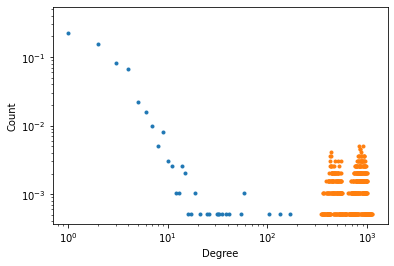

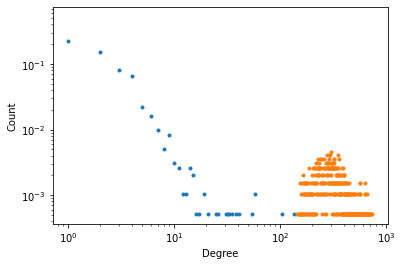

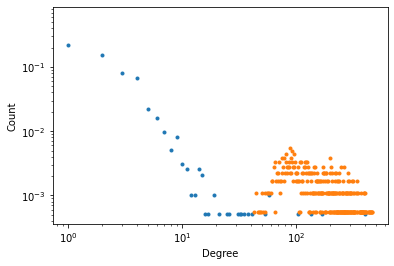

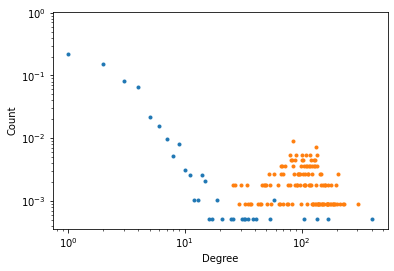

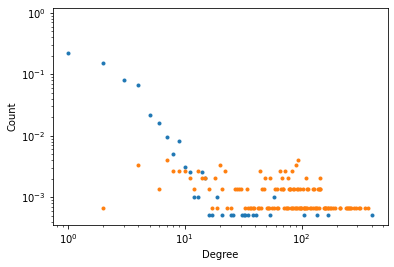

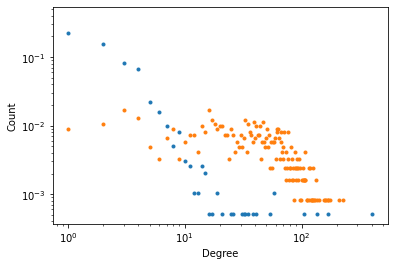

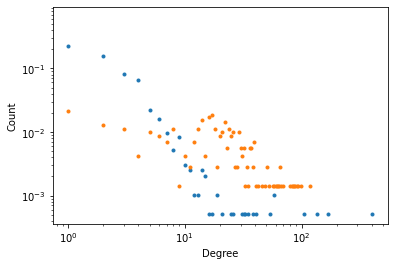

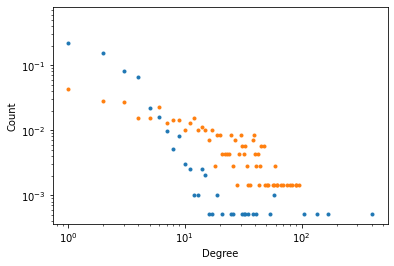

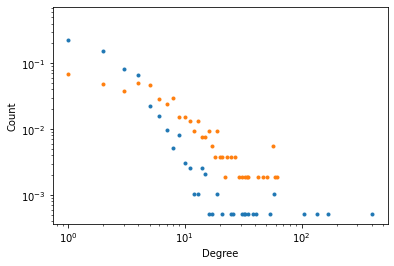

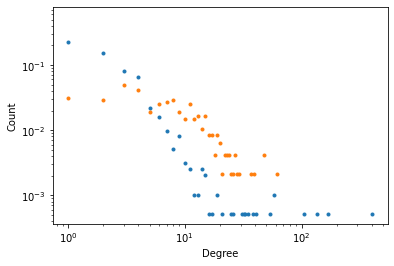

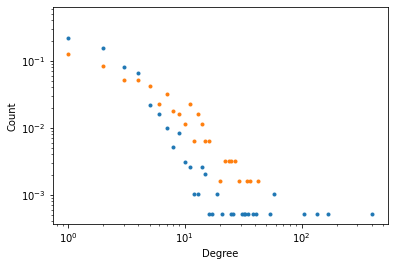

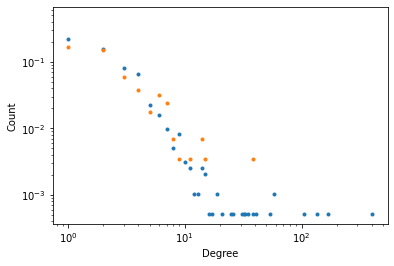

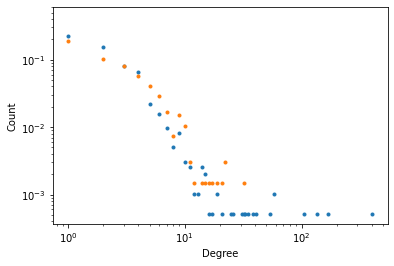

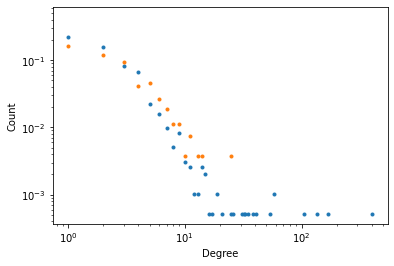

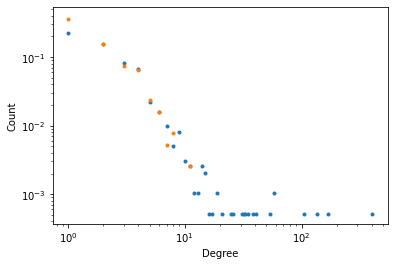

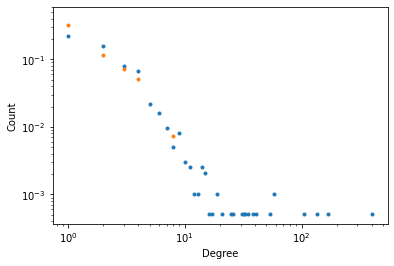

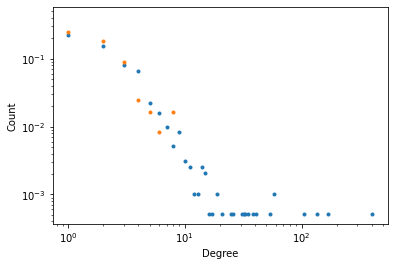

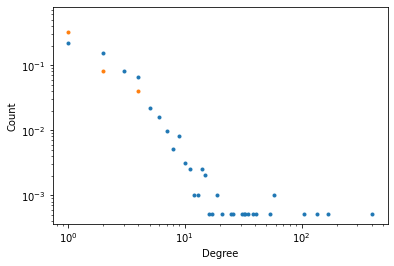

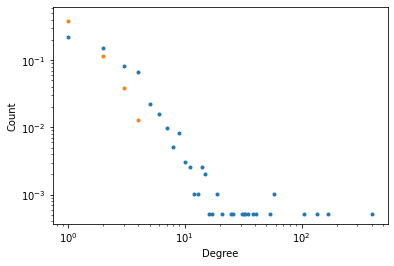

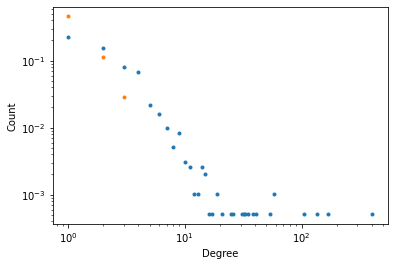

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout


import json as js
#f = open('sorghum.json',)
#data=js.load(f)
#data={"nodes": [{"data": {"id": "a", "label": "Gene1"}},{"data": {"id": "b", "label": "Gene2"}},{"data": {"id": "c", "label": "Gene3"}},{"data": {"id": "d", "label": "Gene4"}},{"data": {"id": "e", "label": "Gene5"}},{"data": {"id": "f", "label": "Gene6"}}],"edges": [{"data": {"id": "ab","source": "a","target": "b"}},{"data": {"id": "cd","source": "c","target": "d"}},{"data": {"id": "ef","source": "e","target": "f"}},{"data": {"id": "ac","source": "a","target": "d"}},{"data": {"id": "be","source": "b","target": "e"}}]        }
#print(data)
print("AAAAAAAAAAAAAAA")
out_deg_dist=dict()
in_deg_dist=dict()
G_col=nx.read_edgelist("E_coli_GRN\E_coli_GRN_edges_only.txt",create_using=nx.DiGraph())
G_col=max(ut.connected_component_subgraphs(G_col),key=len)
G_col=nx.convert_node_labels_to_integers(G_col)
G_coli=nx.DiGraph()
for i in G_col.nodes:
    G_coli.add_node(i)
for i in G_col.edges:
    G_coli.add_edge(i[0],i[1])
for i in G_coli.nodes:
    in_deg_dist[i]=0
    out_deg_dist[i]=0
    for j in G_coli.predecessors(i):
        in_deg_dist[i]=in_deg_dist[i]+1
    for j in G_coli.successors(i):
        out_deg_dist[i]=out_deg_dist[i]+1

inList=list(in_deg_dist.values())
outList=list(out_deg_dist.values())
inList=sorted(inList)
outList=sorted(outList)
#ut.loglog_degree_sequence_plot(G_coli)
'''
bins = np.arange(0, 200, 1) # fixed bin size

#plt.xlim([0, 200])



hist, bins = np.histogram(outList, bins=bins)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(outList, bins=bins, alpha=0.5,log=True)
plt.xscale('log')
plt.title('')
plt.xlabel('Degree')
plt.ylabel('Count')

plt.show()
'''
G=dup.GRN_seed_graph()
steps=len(G_coli.nodes)-len(G.nodes)
print(steps)
node_remover=[]
G_vec=[]
for q in [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]:

    G_q=dup.ped_pea_single_lineage(G,steps,0,q,iteration=0,isolated_nodes_allowed=False)
    
    #for i in G_q.nodes():
    #    if len(list(G_q.predecessors(i)))==0 and len(list(G_q.successors(i)))==0:
    #        node_remover.append(i)
    #if len(node_remover)!=0:
    #    G_q.remove_nodes_from(node_remover)
    G_vec.append(G_q)
    #ut.pair_loglog_degree_sequence_plot(G_q,G)
        
    #G=nx.Graph()
    #for e in G_sorg.edges():
    #    G.add_edge(G_sorg.nodes[e[0]]['l'],G_sorg.nodes[e[1]]['l'])


    #nt = Network('1000px', '1000px',directed=True)

    #nt.from_nx(G_coli)
    #nt.show_buttons()
    #nt.show('nx.html')
    plt.figure()
    out_deg_dist=dict()
    in_deg_dist=dict()
    for i in G_coli.nodes:
            
        in_deg_dist[i]=0
        out_deg_dist[i]=0
        for j in G_coli.predecessors(i):
            in_deg_dist[i]=in_deg_dist[i]+1
        for j in G_coli.successors(i):
            out_deg_dist[i]=out_deg_dist[i]+1

    inList=list(in_deg_dist.values())
    outList=list(out_deg_dist.values())
    inList=sorted(inList)
    outList=sorted(outList)
    inDist=dict()
    outDist=dict()
    for i in set(inList):
        inDist[i]=inList.count(i)/len(inList)
    for i in set(outList):
        outDist[i]=outList.count(i)/len(outList)
    inList=sorted(list(set(inList)))
    outList=sorted(list(set(outList)))
    
    plt.plot(outList,list(outDist.values()),'.')
    #bins = np.arange(0, max(outList), 1) # fixed bin size

    #hist, bins = np.histogram(outList, bins=bins)
    #logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    #plt.hist(outList, bins=bins, alpha=0.5,log=True)

    out_deg_dist=dict()
    in_deg_dist=dict()
    for i in G_q.nodes:
            
        in_deg_dist[i]=0
        out_deg_dist[i]=0
        for j in G_q.predecessors(i):
            in_deg_dist[i]=in_deg_dist[i]+1
        for j in G_q.successors(i):
            out_deg_dist[i]=out_deg_dist[i]+1

    inList=list(in_deg_dist.values())
    outList=list(out_deg_dist.values())
    inList=sorted(inList)
    outList=sorted(outList)
    inDist=dict()
    outDist=dict()
    for i in set(inList):
        inDist[i]=inList.count(i)/len(inList)
    for i in set(outList):
        outDist[i]=outList.count(i)/len(outList)
    inList=sorted(list(set(inList)))
    outList=sorted(list(set(outList)))
    
    plt.plot(outList,list(outDist.values()),'.')
    #bins = np.arange(0, max(outList), 1) # fixed bin size

    #hist, bins = np.histogram(outList, bins=bins)
    #logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    #plt.hist(outList, bins=bins, alpha=0.5,log=True)

    plt.xscale('log')
    plt.yscale('log')
    plt.title('')
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.show()

    


In [9]:
import pickle
with open('G_vec.pkl', 'wb') as f:
    pickle.dump(G_vec, f)



In [ ]:


with open('G_vec.pkl', 'rb') as f:
    mybist=pickle.load(f)

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout
import pickle
import json as js
#f = open('sorghum.json',)
#data=js.load(f)
#data={"nodes": [{"data": {"id": "a", "label": "Gene1"}},{"data": {"id": "b", "label": "Gene2"}},{"data": {"id": "c", "label": "Gene3"}},{"data": {"id": "d", "label": "Gene4"}},{"data": {"id": "e", "label": "Gene5"}},{"data": {"id": "f", "label": "Gene6"}}],"edges": [{"data": {"id": "ab","source": "a","target": "b"}},{"data": {"id": "cd","source": "c","target": "d"}},{"data": {"id": "ef","source": "e","target": "f"}},{"data": {"id": "ac","source": "a","target": "d"}},{"data": {"id": "be","source": "b","target": "e"}}]        }
#print(data)
print("AAAAAAAAAAAAAAA")
out_deg_dist=dict()
in_deg_dist=dict()
G_col=nx.read_edgelist("E_coli_GRN\E_coli_GRN_edges_only.txt",create_using=nx.DiGraph())
G_col=max(ut.connected_component_subgraphs(G_col),key=len)
print(G_col.nodes)
G_col=nx.convert_node_labels_to_integers(G_col)
G_coli=nx.DiGraph()
for i in G_col.nodes:
    G_coli.add_node(i)
for i in G_col.edges:
    G_coli.add_edge(i[0],i[1])
for i in G_coli.nodes:
    in_deg_dist[i]=0
    out_deg_dist[i]=0
    for j in G_coli.predecessors(i):
        in_deg_dist[i]=in_deg_dist[i]+1
    for j in G_coli.successors(i):
        out_deg_dist[i]=out_deg_dist[i]+1

inList=list(in_deg_dist.values())
outList=list(out_deg_dist.values())
inList=sorted(inList)
outList=sorted(outList)

G=dup.GRN_seed_graph()
steps=len(G_coli.nodes)-len(G.nodes)
print(steps)
node_remover=[]
G_dict=dict()
for r in [0.1]:
    for q in [0.8,0.9]:
        G_dict[(r,q)]=[]
        for i in range(1):
            print(r,q,i)
            G_q=dup.ped_pea_single_lineage(G,steps,r,q,iteration=0,isolated_nodes_allowed=False)
            
            #for i in G_q.nodes():
            #    if len(list(G_q.predecessors(i)))==0 and len(list(G_q.successors(i)))==0:
            #        node_remover.append(i)
            #if len(node_remover)!=0:
            #    G_q.remove_nodes_from(node_remover)
            G_dict[(r,q)].append(G_q)

with open('G_dict_rq.pkl', 'wb') as f:
    pickle.dump(G_dict, f)


AAAAAAAAAAAAAAA
['accb', 'accc', 'acrr', 'acra', 'acrb', 'flhc', 'flhd', 'mara', 'marb', 'marr', 'micf', 'soxr', 'soxs', 'ada', 'aidb', 'alka', 'alkb', 'adiy', 'adia', 'gada', 'gadb', 'gadc', 'gadx', 'gltb', 'gltd', 'gltf', 'agar', 'agaa', 'agab', 'agac', 'agad', 'agai', 'agas', 'agav', 'agaw', 'kbay', 'kbaz', 'appy', 'appa', 'appb', 'appc', 'appx', 'hyaa', 'hyab', 'hyac', 'hyad', 'hyae', 'hyaf', 'arac', 'araa', 'arab', 'arad', 'arae', 'araf', 'arag', 'arah', 'araj', 'xyla', 'xylb', 'ydem', 'yden', 'ygea', 'arca', 'acea', 'aceb', 'acee', 'acef', 'acek', 'acka', 'acna', 'acnb', 'alda', 'arcz', 'beta', 'betb', 'beti', 'bett', 'cada', 'cadb', 'caia', 'caib', 'caic', 'caid', 'caie', 'cait', 'citc', 'citd', 'cite', 'citf', 'citg', 'citx', 'cyda', 'cydb', 'cydc', 'cydd', 'cyoa', 'cyob', 'cyoc', 'cyod', 'cyoe', 'dcta', 'dcuc', 'dpia', 'dpib', 'fada', 'fadb', 'fadd', 'fade', 'fadh', 'fadi', 'fadj', 'fadl', 'fnr', 'foca', 'fuma', 'fumb', 'fumc', 'gade', 'gadf', 'gata', 'gatb', 'gatc', 'gatd', '

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout
import pickle
import json as js
with open('G_dict_rq.pkl', 'rb') as f:
    mybist=pickle.load(f)

0.0021625427479380404


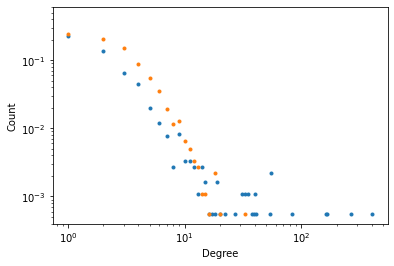

In [3]:
    print(nx.transitivity(mybist[(0.5,0.7)][0]))
    plt.figure()
    out_deg_dist=dict()
    in_deg_dist=dict()
    for i in G_coli.nodes:
            
        in_deg_dist[i]=0
        out_deg_dist[i]=0
        for j in G_coli.predecessors(i):
            in_deg_dist[i]=in_deg_dist[i]+1
        for j in G_coli.successors(i):
            out_deg_dist[i]=out_deg_dist[i]+1

    inList=list(in_deg_dist.values())
    outList=list(out_deg_dist.values())
    inList=sorted(inList)
    outList=sorted(outList)
    inDist=dict()
    outDist=dict()
    for i in set(inList):
        inDist[i]=inList.count(i)/len(inList)
    for i in set(outList):
        outDist[i]=outList.count(i)/len(outList)
    inList=sorted(list(set(inList)))
    outList=sorted(list(set(outList)))
    
    plt.plot(outList,list(outDist.values()),'.')
    #bins = np.arange(0, max(outList), 1) # fixed bin size

    #hist, bins = np.histogram(outList, bins=bins)
    #logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    #plt.hist(outList, bins=bins, alpha=0.5,log=True)

    out_deg_dist=dict()
    in_deg_dist=dict()
    for i in G_q.nodes:
            
        in_deg_dist[i]=0
        out_deg_dist[i]=0
        for j in G_q.predecessors(i):
            in_deg_dist[i]=in_deg_dist[i]+1
        for j in G_q.successors(i):
            out_deg_dist[i]=out_deg_dist[i]+1

    inList=list(in_deg_dist.values())
    outList=list(out_deg_dist.values())
    inList=sorted(inList)
    outList=sorted(outList)
    inDist=dict()
    outDist=dict()
    for i in set(inList):
        inDist[i]=inList.count(i)/len(inList)
    for i in set(outList):
        outDist[i]=outList.count(i)/len(outList)
    inList=sorted(list(set(inList)))
    outList=sorted(list(set(outList)))
    
    plt.plot(outList,list(outDist.values()),'.')
    #bins = np.arange(0, max(outList), 1) # fixed bin size

    #hist, bins = np.histogram(outList, bins=bins)
    #logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    #plt.hist(outList, bins=bins, alpha=0.5,log=True)

    plt.xscale('log')
    plt.yscale('log')
    plt.title('')
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.show()



In [18]:
print("AAAAAAAAAAAAAAA")
out_deg_dist=dict()
in_deg_dist=dict()
G_col=nx.read_edgelist("E_coli_GRN\E_coli_GRN_edges_only.txt",create_using=nx.DiGraph())
G_col=max(ut.connected_component_subgraphs(G_col),key=len)

G_col=nx.convert_node_labels_to_integers(G_col)
G_coli=nx.DiGraph()
for i in G_col.nodes:
    G_coli.add_node(i)
for i in G_col.edges:
    G_coli.add_edge(i[0],i[1])
for i in G_coli.nodes:
    in_deg_dist[i]=0
    out_deg_dist[i]=0
    for j in G_coli.predecessors(i):
        in_deg_dist[i]=in_deg_dist[i]+1
    for j in G_coli.successors(i):
        out_deg_dist[i]=out_deg_dist[i]+1

inList=list(in_deg_dist.values())
outList=list(out_deg_dist.values())
inList=sorted(inList)
outList=sorted(outList)

dictG = nx.to_dict_of_dicts(G_coli)
for i in dictG.keys():
    
    dictG[i]=list(dictG[i].keys())

len(G_coli.nodes)
nt = Network('1000px', '1000px',directed=True)

nt.from_nx(G_coli)
nt.show_buttons()
nt.show('nx.html')

AAAAAAAAAAAAAAA


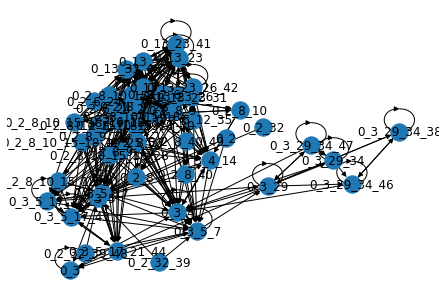

In [50]:

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
from Genetc import ancestral as anc
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout
import pickle
import json as js


'''
G=nx.DiGraph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(1,4),(3,4),(3,2),(4,4),(5,4)])

G=dup.GRN_seed_graph()
m=0
r=0
q=0.9
steps=1
iteration=0
while m<steps:
    G_test=dup.PED_PEA(G,r,q,iteration=iteration+m+1)
                
    node_remover=list(nx.isolates(G_test))
                
    if len(node_remover)==0:
                    
        m=m+1
        G=G_test
G=nx.erdos_renyi_graph(7,0.5,directed=True)
G=nx.DiGraph()
G.add_nodes_from([0,1,2,3,4,5,6,7,8])
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(0,3) 
G.add_edge(4,5)
G.add_edge(4,6)
G.add_edge(4,7)
G.add_edge(8,4)

G.add_edge(0,4)
G.add_edge(8,8)
G.add_edge(4,4)
#G.add_edge(0,'1_0')
'''
m=0
r=0
q=0.4
#G=dup.PED_PEA(G,r,q,iteration=m)
G=dup.GRN_seed_graph()
#nx.draw(G,with_labels=True)
steps=42
iteration=0
while m<steps:
    G_test=dup.PED_PEA(G,r,q,iteration=iteration+m+1)
                
    node_remover=list(nx.isolates(G_test))
              
    if len(node_remover)==0:
                    
        m=m+1
        G=G_test

G=graphDict[0.3][1][49]
nx.draw(G,with_labels=True)

[(0, '0_3'), (0, '0_7'), (0, '0_10'), (0, '0_7_11'), (0, '0_10_13'), (0, '0_17'), (0, '0_10_21'), (0, '0_27'), (0, '0_7_30'), (0, '0_10_21_32'), (0, '0_33'), (0, '0_27_38'), (0, '0_7_11_43'), ('0_3', '0_7'), ('0_3', '0_10'), ('0_3', '0_7_11'), ('0_3', '0_10_13'), ('0_3', '0_17'), ('0_3', '0_10_21'), ('0_3', '0_27'), ('0_3', '0_7_30'), ('0_3', '0_10_21_32'), ('0_3', '0_33'), ('0_3', '0_27_38'), ('0_3', '0_7_11_43'), ('0_7', '0_10'), ('0_7', '0_7_11'), ('0_7', '0_10_13'), ('0_7', '0_17'), ('0_7', '0_10_21'), ('0_7', '0_27'), ('0_7', '0_7_30'), ('0_7', '0_10_21_32'), ('0_7', '0_33'), ('0_7', '0_27_38'), ('0_7', '0_7_11_43'), ('0_3_8', '0_3_8_44'), ('0_10', '0_7_11'), ('0_10', '0_10_13'), ('0_10', '0_17'), ('0_10', '0_10_21'), ('0_10', '0_27'), ('0_10', '0_7_30'), ('0_10', '0_10_21_32'), ('0_10', '0_33'), ('0_10', '0_27_38'), ('0_10', '0_7_11_43'), ('0_7_11', '0_10_13'), ('0_7_11', '0_17'), ('0_7_11', '0_10_21'), ('0_7_11', '0_27'), ('0_7_11', '0_7_30'), ('0_7_11', '0_10_21_32'), ('0_7_11'

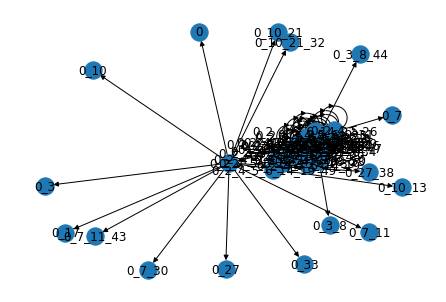

In [43]:
import random
        
#G.add_nodes_from([1,2,3,4])
#G.add_edges_from([(2,1),(3,2),(3,4),(1,1),(3,3),(4,2)])
#G15=anc.node_merger(G,3,4,self_loops=True)
#nx.draw(G15,with_labels=True)


#G=dup.GRN_seed_graph_ped_pea(100,0,0.4)
tally1=0
tally2=0
tally3=0
tally4=0
tally5=0
num=100000
'''for i in range(0,num):
    G15=anc.node_merger(G,1,2,self_loops=True)
    #nx.draw(G15,with_labels=True)
    G15_next=dup.PED_PEA(G15,0,0.5)
    if nx.is_isomorphic(G15_next,G):
        tally1=tally1+1
        #print(list(G15_next.predecessors(1)),list(G15_next.successors(1)))
        
    
    #for i in G15_next.nodes():
    #    if len(str(i))>1:
    #        if i[0]=='1':
    #            tally1=tally1+1
    #        elif i[0]=='2':
    #            tally2=tally2+1
    #        elif i[0]=='3':
    #            tally3=tally3+1
    #        elif i[0]=='4':
    #            tally4=tally4+1
    #        else:
    #            tally5=tally5+1
    #plt.figure()
    #nx.draw(G15_next,with_labels=True)
print(tally1/num)
print(tally2/num)
print(tally3/num)
print(tally4/num)
print(tally5/num)'''

maximum=0
q=q
maxPair=[]

for ind,i in enumerate(G.nodes):
    for j in list(G.nodes)[-(len(list(G.nodes))-ind-1):]:
      if ind<len(list(G.nodes))-1:
        GPrev=anc.node_merger(G,i,j,self_loops=True)
        testMax=anc.ancestral_likelihood_of_anchor_PD(G,GPrev,i,j,q,divide_by_n=True,NK=True)
        if testMax>maximum:
            maximum=testMax
            maxPair=[]
        if testMax==maximum:
            maxPair.append((i,j))
        
        #print(i,j,testMax)
for (i,j) in maxPair:
    if (j,i) not in maxPair:
        maxPair.append((j,i))
remover=[]
for (i,j) in maxPair:
    if (j,i) in maxPair:
        if list(G.nodes).index(i)<list(G.nodes).index(j):
            remover.append((j,i))
                            
        else:
            remover.append((i,j)) 
                            
maxPair=[i for i in maxPair if i not in remover]
print(maxPair)
maxPair=random.choice(maxPair)
print("navlakha chose",maxPair)
'''
maximum=0
maxPair=[]
goodLikelihoods=anc.most_likely_previous_graph_fast(G,q,divide_by_n=True,timesTwo=False,auto=True)
print(goodLikelihoods)
for j in goodLikelihoods:
    for i in goodLikelihoods[j]:
        testMax=goodLikelihoods[j][i]
        if testMax>maximum:
            maximum=testMax
            maxPair=[]
        if testMax==maximum:
            maxPair.append((i,j))
print(maxPair)
maxPair=random.choice(maxPair)
print("auto notimestwo chose",maxPair)
'''
maximum=0
maxPair=[]
goodLikelihoods=anc.most_likely_previous_graph_fast(G,q,divide_by_n=True,timesTwo=False,auto=False,non_specific=True)
#print(goodLikelihoods)
for j in goodLikelihoods:
    for i in goodLikelihoods[j]:
        testMax=goodLikelihoods[j][i]
        if testMax>maximum:
            maximum=testMax
            maxPair=[]
        if testMax==maximum:
            maxPair.append((i,j))

for (i,j) in maxPair:
    if (j,i) not in maxPair:
        maxPair.append((j,i))

remover=[]
for (i,j) in maxPair:
    if (j,i) in maxPair:
        if list(G.nodes).index(i)<list(G.nodes).index(j):
            remover.append((j,i))
            
        else:
            remover.append((i,j)) 
            
maxPair=[i for i in maxPair if i not in remover]
print(maxPair)
maxPair=random.choice(maxPair)
print("auto timesTwo chose",maxPair)
'''
maximum=0
maxPair=[]
goodLikelihoods=anc.most_likely_previous_graph_fast(G,q,divide_by_n=True,timesTwo=False,auto=False)
print(goodLikelihoods)
for j in goodLikelihoods:
    for i in goodLikelihoods[j]:
        testMax=goodLikelihoods[j][i]
        if testMax>maximum:
            maximum=testMax
            maxPair=[]
        if testMax==maximum:
            maxPair.append((i,j))
print(maxPair)
maxPair=random.choice(maxPair)
print("no auto no timesTwo chose",maxPair)
'''
'''
maximum=0
maxPair=[]
goodLikelihoods=anc.most_likely_previous_graph_fast(G,q,divide_by_n=True,timesTwo=True,auto=False)
print(goodLikelihoods)
for j in goodLikelihoods:
    for i in goodLikelihoods[j]:
        testMax=goodLikelihoods[j][i]
        if testMax>maximum:
            maximum=testMax
            maxPair=[]
        if testMax==maximum:
            maxPair.append((i,j))
print(maxPair)
maxPair=random.choice(maxPair)
print("no auto timesTwo chose",maxPair)

'''

maximum=0
maxPair=[]
goodLikelihoods=anc.most_likely_previous_graph_fast(G,q,divide_by_n=True,timesTwo=True,auto=True,non_specific=False)
#print(goodLikelihoods)
for j in goodLikelihoods:
    for i in goodLikelihoods[j]:
        testMax=goodLikelihoods[j][i]
        if testMax>maximum:
            maximum=testMax
            maxPair=[]
        if testMax==maximum:
            maxPair.append((i,j))
for (i,j) in maxPair:
    if (j,i) not in maxPair:
        maxPair.append((j,i))
remover=[]
for (i,j) in maxPair:
    if (j,i) in maxPair:
        if list(G.nodes).index(i)<list(G.nodes).index(j):
            remover.append((j,i))
                            
        else:
            remover.append((i,j)) 
                            
maxPair=[i for i in maxPair if i not in remover]
print(maxPair)
maxPair=random.choice(maxPair)
print("baseline chose",maxPair)
nx.draw(G,with_labels=True)


## Generate the true networks


### Model seed

In [2]:
#Generate 1000 node networks and record their history and save to a pickle
#Reconstruct history with each approach and save the histories to a pickle
#Measure various things about each algorithm and compare them to groundtruth

#The dictionary produced here has the extant graph as the last entry, and the seed graph as the first.
#This is in contrast to the dictionaries produced from the ancestral reconstruction, where the extant 
#graph is not included, the first graph is one step back in time, and the last graph is the estimate
#of the seed graph.

#The i'th position of the ancestral vector should be compared to the i-2th position of the tru graph 
#vector.
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
import pickle
#seedType='ER'
#seedType='GRN'
seedType='model'
sampleNo=100
G_dict=dict()
for q in [0.8]:
        
        '''
        node_remover=[]
        while m<steps:
            G_seed_test=dup.PED_PEA(G_seed,r,q,iteration=iteration+m+1)
            node_remover=list(nx.isolates(G_seed_test))
                
            if len(node_remover)==0:
                G_seed_test=dup.PED_PEA(G_seed,r,q,iteration=iteration+m+1)    
                m=m+1
                G_seed=G_seed_test
        ''' 
        
        steps=49
        m=0
        r=0
        G_dict[q]=dict()
        G_seed=nx.DiGraph()
        
        G_seed.add_edge(0,0)
        for i in range(sampleNo):
            iteration=1
            
            G_q=G_seed
            G_dict[q][i]=[]
            print(q,i)
            m=0
            G_dict[q][i].append(G_q)
            while m<steps:
                G_q=dup.PED_PEA(G_q,r,q,iteration=iteration+m+1)
                #node_remover=list(nx.isolates(G_q_test))
                m=m+1
                G_dict[q][i].append(G_q)
                #if len(node_remover)==0:
    
                #   m=m+1
                #    G_q=G_q_test
                #    G_dict[q][i].append(G_q)
        
with open('likelihood_test/'+seedType+'_seed/G_dict_rq_nktest.pkl', 'wb') as f:
    pickle.dump(G_dict, f)


0.8 0
0.8 1
0.8 2
0.8 3
0.8 4
0.8 5
0.8 6
0.8 7
0.8 8
0.8 9
0.8 10
0.8 11
0.8 12
0.8 13
0.8 14
0.8 15
0.8 16
0.8 17
0.8 18
0.8 19
0.8 20
0.8 21
0.8 22
0.8 23
0.8 24
0.8 25
0.8 26
0.8 27
0.8 28
0.8 29
0.8 30
0.8 31
0.8 32
0.8 33
0.8 34
0.8 35
0.8 36
0.8 37
0.8 38
0.8 39
0.8 40
0.8 41
0.8 42
0.8 43
0.8 44
0.8 45
0.8 46
0.8 47
0.8 48
0.8 49
0.8 50
0.8 51
0.8 52
0.8 53
0.8 54
0.8 55
0.8 56
0.8 57
0.8 58
0.8 59
0.8 60
0.8 61
0.8 62
0.8 63
0.8 64
0.8 65
0.8 66
0.8 67
0.8 68
0.8 69
0.8 70
0.8 71
0.8 72
0.8 73
0.8 74
0.8 75
0.8 76
0.8 77
0.8 78
0.8 79
0.8 80
0.8 81
0.8 82
0.8 83
0.8 84
0.8 85
0.8 86
0.8 87
0.8 88
0.8 89
0.8 90
0.8 91
0.8 92
0.8 93
0.8 94
0.8 95
0.8 96
0.8 97
0.8 98
0.8 99


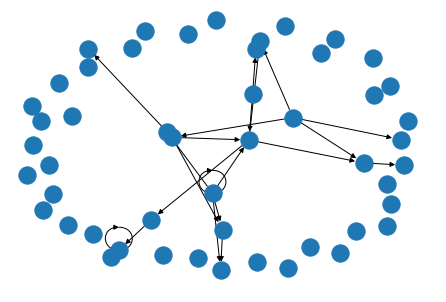

In [3]:
nx.draw(G_dict[0.8][0][49])

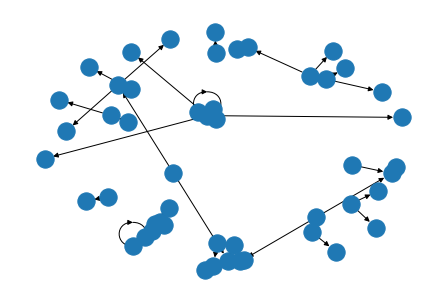

In [6]:
q=0.9
G=G_seed
G=dup.PED_PEA_isolates_corrected(G,0,q,steps=49,iteration=1)
nx.draw(G)

### GRN seed


In [ ]:
#Generate 1000 node networks and record their history and save to a pickle
#Reconstruct history with each approach and save the histories to a pickle
#Measure various things about each algorithm and compare them to groundtruth

#The dictionary produced here has the extant graph as the last entry, and the seed graph as the first.
#This is in contrast to the dictionaries produced from the ancestral reconstruction, where the extant 
#graph is not included, the first graph is one step back in time, and the last graph is the estimate
#of the seed graph.

#The i'th position of the ancestral vector should be compared to the i-2th position of the tru graph 
#vector.
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
import pickle
#seedType='ER'
seedType='GRN'
sampleNo=100
G_q=dup.GRN_seed_graph()
steps=50-len(G_q.nodes)
print(steps)
node_remover=[]
G_dict=dict()
r=0
iteration=0
for q in [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
        G_dict[q]=dict()
        for i in range(sampleNo):
            G_q=dup.GRN_seed_graph()
            G_dict[q][i]=[]
            print(q,i)
            m=0
            G_dict[q][i].append(G_q)
            while m<steps:
                G_q_test=dup.PED_PEA(G_q,r,q,iteration=iteration+m+1)
                
                node_remover=list(nx.isolates(G_q_test))
                
                if len(node_remover)==0:
                
                    m=m+1
                    G_q=G_q_test
                    G_dict[q][i].append(G_q)

with open('likelihood_test/'+seedType+'_seed/G_dict_rq_nktest.pkl', 'wb') as f:
    pickle.dump(G_dict, f)


### ER Seed

In [ ]:
#Generate 1000 node networks and record their history and save to a pickle
#Reconstruct history with each approach and save the histories to a pickle
#Measure various things about each algorithm and compare them to groundtruth

#The dictionary produced here has the extant graph as the last entry, and the seed graph as the first.
#This is in contrast to the dictionaries produced from the ancestral reconstruction, where the extant 
#graph is not included, the first graph is one step back in time, and the last graph is the estimate
#of the seed graph.

#The i'th position of the ancestral vector should be compared to the i-2th position of the tru graph 
#vector.
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
import pickle
#seedType='ER'
seedType='ER'
sampleNo=100
G_seed=nx.erdos_renyi_graph(25,0.1,directed=True)
while not nx.is_connected(G_seed.to_undirected()):
    G_seed=nx.erdos_renyi_graph(25,0.1,directed=True)
print("is directed",nx.is_directed(G_seed))
for i in range(3):
    rand=np.random.randint(0,len(G_seed.nodes))
    G_seed.add_edge(rand,rand)
steps=50-len(G_seed.nodes)
print(steps)
node_remover=[]
G_dict=dict()
r=0
iteration=0
for q in [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
        G_dict[q]=dict()
        for i in range(sampleNo):
            G_q=G_seed
            G_dict[q][i]=[]
            print(q,i)
            m=0
            G_dict[q][i].append(G_q)
            while m<steps:
                G_q_test=dup.PED_PEA(G_q,r,q,iteration=iteration+m+1)``
                
                node_remover=list(nx.isolates(G_q_test))
                
                if len(node_remover)==0:
                
                    m=m+1
                    G_q=G_q_test
                    G_dict[q][i].append(G_q)

with open('likelihood_test/'+seedType+'_seed/G_dict_rq_nktest.pkl', 'wb') as f:
    pickle.dump(G_dict, f)


In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
from Genetc import alignment as al
import pickle
seedType='model'
with open('likelihood_test/'+seedType+'_seed/G_dict_rq_nktest.pkl', 'rb') as f:
    graphDict=pickle.load(f)
#print(graphDict)

In [ ]:
sampleNo=100
G_q=dup.GRN_seed_graph()
steps=50-len(G_q.nodes)
print(steps)
node_remover=[]
graphDict=dict()
r=0
iteration=0
for q in [0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
        graphDict[q]=dict()
        for i in range(sampleNo):
            G_q=nx.erdos_renyi_graph(25,0.2,directed=True)
            graphDict[q][i]=[]
            print(q,i)
            m=0
            graphDict[q][i].append(G_q)
            while m<steps:
                G_q_noauto=dup.PED_PEA(G_q,r,q,iteration=iteration+m+1)
                
                node_remover=list(nx.isolates(G_q_noauto))
                
                if len(node_remover)==0:
                
                    m=m+1
                    G_q=G_q_test
                    graphDict[q][i].append(G_q)


## Create the ancestral reconstructions

### Randomly select pairs to merge as baseline

In [6]:
from Genetc import ancestral as anc
import random

randDict=dict()
sampleNo=100
maxPairsRand=dict()

#decideType='random'
decideType='max_EC'
#decideType='max_likelihood'
#decideType='max_lineage_likelihood'
stepsBack=25
print([q for q in graphDict])
count=0
for q in graphDict:
    #print(q)
    randDict[q]=dict()
    
    maxPairsRand[q]=dict()
    
    #finalGraph=graphDict[q][k][-1]

    for k in range(sampleNo):
        #print(k)
        
        randDict[q][k]=[]
    
        maxPairsRand[q][k]=[]
        finalGraph=graphDict[q][k][-1]
        G_rand=finalGraph
        maximum=0
        while len(G_rand.nodes)>stepsBack:
            
            graphDictIndex=len(G_rand.nodes)-len(finalGraph.nodes)-2
            
            maximum=0
            maxPair=[]
            goodLikelihoods=[(i,j) for ind, i in enumerate(G_rand.nodes) for jnd,j in enumerate(G_rand.nodes) if ind<jnd]
            
                               
            maxPair=random.choice(goodLikelihoods)
            if len(G_rand.nodes)==50:
                
                        if isinstance(maxPair[1],str):
                            count=count+1 
            G_rand=anc.node_merger(G_rand,maxPair[0],maxPair[1],self_loops=True)
            randDict[q][k].append(G_rand)
            maxPairsRand[q][k].append(maxPair)

print((count/1000))
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_rand.pkl', 'wb') as g:
    pickle.dump(randDict, g)

[0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
0.7


### Check the times two condition

In [ ]:
from Genetc import ancestral as anc
import random

notimestwoDict=dict()
sampleNo=100
maxPairsNotimestwo=dict()

decideType='random'
#decideType='max_EC'
#decideType='max_likelihood'
#decideType='max_lineage_likelihood'
stepsBack=25
print([q for q in graphDict])
for q in graphDict:
    print(q)
    notimestwoDict[q]=dict()
    
    maxPairsNotimestwo[q]=dict()
    
    #finalGraph=graphDict[q][k][-1]
    
    
    
    for k in range(sampleNo):
        print(k)
        notimestwoDict[q][k]=[]
    
        maxPairsNotimestwo[q][k]=[]
        finalGraph=graphDict[q][k][-1]
        G_notimestwo=finalGraph
        maximum=0
        while len(G_notimestwo.nodes)>stepsBack:
            
            graphDictIndex=len(G_notimestwo.nodes)-len(finalGraph.nodes)-2
            
            maximum=0
            maxPair=[]
            goodLikelihoods=anc.most_likely_previous_graph_fast(G_notimestwo,q,divide_by_n=True,timesTwo=False,auto=True)
            
            for j in goodLikelihoods:
                for i in goodLikelihoods[j]:
                    
                    testMax=goodLikelihoods[j][i]
                    if testMax>maximum:
                        maximum=testMax
                        maxPair=[]
                    if testMax==maximum:
                        maxPair.append((i,j))
            
            if decideType=='random':
                
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_notimestwo.nodes).index(i)<list(G_notimestwo.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                                             
                maxPair=random.choice(maxPair)
                G_notimestwo=anc.node_merger(G_notimestwo,maxPair[0],maxPair[1],self_loops=True)
                notimestwoDict[q][k].append(G_notimestwo)
                maxPairsNotimestwo[q][k].append(maxPair)
            
            if decideType=='max_EC':
                maximumEC=0
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_notimestwo.nodes).index(i)<list(G_notimestwo.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                maxPairEC=[]
                #maximumGEC=[]
                
                for ind,i in enumerate(maxPair):
                    currentPair=maxPair[ind]
                    G_EC=anc.node_merger(G_notimestwo,currentPair[0],currentPair[1],self_loops=True)
                    currentEC=al.quick_ec_score(G_EC,graphDict[q][k][graphDictIndex])
                    if currentEC>=maximumEC:
                        if currentEC>maximumEC:
                            #maximumGEC=[]
                            maxPairEC=[]
                        maximumEC=currentEC
                        maxPairEC.append(currentPair)
                        #maximumGEC.append(G_EC)
                maxPair=random.choice(maxPairEC)
                #print("test: post_EC maxpair",maxPair)
                G_notimestwo=anc.node_merger(G_notimestwo,maxPair[0],maxPair[1],self_loops=True)
                notimestwoDict[q][k].append(G_notimestwo)
                maxPairsNotimestwo[q][k].append(maxPair)
    
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_notimestwo.pkl', 'wb') as g:
    pickle.dump(notimestwoDict, g)

In [ ]:
from Genetc import ancestral as anc
import random

noautoDict=dict()
sampleNo=100
maxPairsNoauto=dict()

decideType='max_EC'
#decideType='max_EC'
#decideType='max_likelihood'
#decideType='max_lineage_likelihood'
stepsBack=25
print([q for q in graphDict])
for q in graphDict:
    print(q)
    noautoDict[q]=dict()
    
    maxPairsNoauto[q]=dict()
    
    finalGraph=graphDict[q][k][-1]
    
    
    
    for k in range(sampleNo):
        print(k)
        noautoDict[q][k]=[]
    
        maxPairsNoauto[q][k]=[]
        finalGraph=graphDict[q][k][-1]
        G_noauto=finalGraph
        maximum=0
        while len(G_noauto.nodes)>stepsBack:
            
            graphDictIndex=len(G_noauto.nodes)-len(finalGraph.nodes)-2
            
            maximum=0
            maxPair=[]
            goodLikelihoods=anc.most_likely_previous_graph_noauto(G_noauto,q,divide_by_n=True)
            
            for j in goodLikelihoods:
                for i in goodLikelihoods[j]:
                    
                    testMax=goodLikelihoods[j][i]
                    if testMax>maximum:
                        maximum=testMax
                        maxPair=[]
                    if testMax==maximum:
                        maxPair.append((i,j))
            
            if decideType=='random':
                
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_noauto.nodes).index(i)<list(G_noauto.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                                            
                maxPair=random.choice(maxPair)
                G_noauto=anc.node_merger(G_noauto,maxPair[0],maxPair[1],self_loops=True)
                noautoDict[q][k].append(G_noauto)
                maxPairsNoauto[q][k].append(maxPair)
            
            if decideType=='max_EC':
                maximumEC=0
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_noauto.nodes).index(i)<list(G_noauto.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                maxPairEC=[]
                #maximumGEC=[]
                
                for ind,i in enumerate(maxPair):
                    currentPair=maxPair[ind]
                    G_EC=anc.node_merger(G_noauto,currentPair[0],currentPair[1],self_loops=True)
                    currentEC=al.quick_ec_score(G_EC,graphDict[q][k][graphDictIndex])
                    if currentEC>=maximumEC:
                        if currentEC>maximumEC:
                            #maximumGEC=[]
                            maxPairEC=[]
                        maximumEC=currentEC
                        maxPairEC.append(currentPair)
                        #maximumGEC.append(G_EC)
                maxPair=random.choice(maxPairEC)
                #print("test: post_EC maxpair",maxPair)
                G_noauto=anc.node_merger(G_noauto,maxPair[0],maxPair[1],self_loops=True)
                noautoDict[q][k].append(G_noauto)
                maxPairsNoauto[q][k].append(maxPair)
    
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_noauto.pkl', 'wb') as g:
    pickle.dump(noautoDict, g)

### Check all combos of timestwo and auto

In [ ]:
from Genetc import ancestral as anc
import random
nkDict=dict()
testDict=dict()
noautoDict=dict()
notimestwoDict=dict()
notimestwonoautoDict=dict()
nonspecificDict=dict()
sampleNo=10
maxPairsNK=dict()
maxPairsTest=dict()
maxPairsNoauto=dict()
maxPairsNotimestwo=dict()
maxPairsNotimestwonoauto=dict()
maxPairsNonspecific=dict()
decideType='random'
#decideType='max_EC'
#decideType='max_likelihood'
#decideType='max_lineage_likelihood'
stepsBack=25
print([q for q in graphDict])
for q in [0.9]:
    print(q)
    nkDict[q]=dict()
    testDict[q]=dict()
    maxPairsNK[q]=dict()
    maxPairsTest[q]=dict()
    noautoDict[q]=dict()
    maxPairsNoauto[q]=dict()
    notimestwoDict[q]=dict()
    maxPairsNotimestwo[q]=dict()
    notimestwonoautoDict[q]=dict()
    maxPairsNotimestwonoauto[q]=dict()
    nonspecificDict[q]=dict()
    maxPairsNonspecific[q]=dict()
    for k in range(sampleNo):
        print(k)
        nkDict[q][k]=[]
        testDict[q][k]=[]
        maxPairsNK[q][k]=[]
        maxPairsTest[q][k]=[]
        noautoDict[q][k]=[]
        maxPairsNoauto[q][k]=[]
        notimestwoDict[q][k]=[]
        maxPairsNotimestwo[q][k]=[]
        notimestwonoautoDict[q][k]=[]
        maxPairsNotimestwonoauto[q][k]=[]
        nonspecificDict[q][k]=[]
        maxPairsNonspecific[q][k]=[]

        finalGraph=graphDict[q][k][-1]
        maximum=0
        G_nk=finalGraph
        while len(G_nk.nodes)>stepsBack:
            graphDictIndex=len(G_nk.nodes)-len(finalGraph.nodes)-2
            #print(graphDictIndex)
            maximum=0
            maxPair=[]
            for ind,i in enumerate(G_nk.nodes):
                for j in list(G_nk.nodes)[-(len(list(G_nk.nodes))-ind-1):]:
                    #print(q,k,i,j)
                    if ind<len(list(G_nk.nodes))-1:
                        GPrev=anc.node_merger(G_nk,i,j,self_loops=True)
                        testMax=anc.ancestral_likelihood_of_anchor_PD(G_nk,GPrev,i,j,q,divide_by_n=True,NK=True)
                        if testMax>maximum:
                            maximum=testMax
                            maxPair=[]
                        if testMax==maximum:
                            maxPair.append((i,j))
            if decideType=='random':
                
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_nk.nodes).index(i)<list(G_nk.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                        
                maxPair=random.choice(maxPair)
                G_nk=anc.node_merger(G_nk,maxPair[0],maxPair[1],self_loops=True)
                nkDict[q][k].append(G_nk)
                maxPairsNK[q][k].append(maxPair)
            #print("nk pre_EC maxpair",maxPair)
            if decideType=='max_EC':
                maximumEC=0
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_nk.nodes).index(i)<list(G_nk.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                maxPairEC=[]
                #maximumGEC=[]
                for ind,i in enumerate(maxPair):
                    currentPair=maxPair[ind]
                    G_EC=anc.node_merger(G_nk,currentPair[0],currentPair[1],self_loops=True)
                    currentEC=al.quick_ec_score(G_EC,graphDict[q][k][graphDictIndex])
                    if currentEC>=maximumEC:
                        if currentEC>maximumEC:
                            #maximumGEC=[]
                            maxPairEC=[]
                        maximumEC=currentEC
                        maxPairEC.append(currentPair)
                        #maximumGEC.append(G_EC)
                maxPair=random.choice(maxPairEC)
                #print("nk post_EC maxpair",maxPair)
                G_nk=anc.node_merger(G_nk,maxPair[0],maxPair[1],self_loops=True)
                nkDict[q][k].append(G_nk)
                maxPairsNK[q][k].append(maxPair)
            #if maxPair[0] not in graphDict[q][k][-1-nodesLeft] and maxPair[1] in graphDict[q][k][-1-nodesLeft]:
            #    G_nk=anc.node_merger(G_nk,maxPair[1],maxPair[0],self_loops=True)
            #    nkDict[q][k].append(G_nk)
            #elif maxPair[0] in graphDict[q][k][-1-nodesLeft] and maxPair[1] not in graphDict[q][k][-1-nodesLeft]:
            #    G_nk=anc.node_merger(G_nk,maxPair[0],maxPair[1],self_loops=True)
            #    nkDict[q][k].append(G_nk)
            #else:
            #    rando=np.random.random()
            #    if rando<0.5:
            #        G_nk=anc.node_merger(G_nk,maxPair[0],maxPair[1],self_loops=True)
            #        nkDict[q][k].append(G_nk)
            #    else:
            #        G_nk=anc.node_merger(G_nk,maxPair[1],maxPair[0],self_loops=True)
            #        nkDict[q][k].append(G_nk)
            
        G_test=finalGraph
        while len(G_test.nodes)>stepsBack:
            #nodesLeft=len(finalGraph.nodes)-len(G_test.nodes)
            graphDictIndex=len(G_test.nodes)-len(finalGraph.nodes)-2
            #print(graphDictIndex)
            maximum=0
            maxPair=[]
            goodLikelihoods=anc.most_likely_previous_graph_fast(G_test,q,divide_by_n=True,timesTwo=True,auto=True)
            #print(goodLikelihoods)
            for j in goodLikelihoods:
                for i in goodLikelihoods[j]:
                    #print(q,k,i,j)
                    testMax=goodLikelihoods[j][i]
                    if testMax>maximum:
                        maximum=testMax
                        maxPair=[]
                    if testMax==maximum:
                        maxPair.append((i,j))
            
            if decideType=='random':
                
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_test.nodes).index(i)<list(G_test.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                                             
                maxPair=random.choice(maxPair)
                G_test=anc.node_merger(G_test,maxPair[0],maxPair[1],self_loops=True)
                testDict[q][k].append(G_test)
                maxPairsTest[q][k].append(maxPair)
            #print("test: pre_EC maxpair",maxPair)
            if decideType=='max_EC':
                maximumEC=0
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_test.nodes).index(i)<list(G_test.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                maxPairEC=[]
                #maximumGEC=[]
                
                for ind,i in enumerate(maxPair):
                    currentPair=maxPair[ind]
                    G_EC=anc.node_merger(G_test,currentPair[0],currentPair[1],self_loops=True)
                    currentEC=al.quick_ec_score(G_EC,graphDict[q][k][graphDictIndex])
                    if currentEC>=maximumEC:
                        if currentEC>maximumEC:
                            #maximumGEC=[]
                            maxPairEC=[]
                        maximumEC=currentEC
                        maxPairEC.append(currentPair)
                        #maximumGEC.append(G_EC)
                maxPair=random.choice(maxPairEC)
                #print("test: post_EC maxpair",maxPair)
                G_test=anc.node_merger(G_test,maxPair[0],maxPair[1],self_loops=True)
                testDict[q][k].append(G_test)
                maxPairsTest[q][k].append(maxPair)
        #-----------------------------------------------------
        G_noauto=finalGraph
        maximum=0
        while len(G_noauto.nodes)>stepsBack:
            
            graphDictIndex=len(G_noauto.nodes)-len(finalGraph.nodes)-2
            
            maximum=0
            maxPair=[]
            goodLikelihoods=anc.most_likely_previous_graph_fast(G_noauto,q,divide_by_n=True,timesTwo=True,auto=False)
            
            for j in goodLikelihoods:
                for i in goodLikelihoods[j]:
                    
                    testMax=goodLikelihoods[j][i]
                    if testMax>maximum:
                        maximum=testMax
                        maxPair=[]
                    if testMax==maximum:
                        maxPair.append((i,j))
            
            if decideType=='random':
                
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_noauto.nodes).index(i)<list(G_noauto.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                                            
                maxPair=random.choice(maxPair)
                G_noauto=anc.node_merger(G_noauto,maxPair[0],maxPair[1],self_loops=True)
                noautoDict[q][k].append(G_noauto)
                maxPairsNoauto[q][k].append(maxPair)
            
            if decideType=='max_EC':
                maximumEC=0
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_noauto.nodes).index(i)<list(G_noauto.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                maxPairEC=[]
                #maximumGEC=[]
                
                for ind,i in enumerate(maxPair):
                    currentPair=maxPair[ind]
                    G_EC=anc.node_merger(G_noauto,currentPair[0],currentPair[1],self_loops=True)
                    currentEC=al.quick_ec_score(G_EC,graphDict[q][k][graphDictIndex])
                    if currentEC>=maximumEC:
                        if currentEC>maximumEC:
                            #maximumGEC=[]
                            maxPairEC=[]
                        maximumEC=currentEC
                        maxPairEC.append(currentPair)
                        #maximumGEC.append(G_EC)
                maxPair=random.choice(maxPairEC)
                #print("test: post_EC maxpair",maxPair)
                G_noauto=anc.node_merger(G_noauto,maxPair[0],maxPair[1],self_loops=True)
                noautoDict[q][k].append(G_noauto)
                maxPairsNoauto[q][k].append(maxPair)
        #------------------------------------------
        G_notimestwo=finalGraph
        maximum=0
        while len(G_notimestwo.nodes)>stepsBack:
            
            graphDictIndex=len(G_notimestwo.nodes)-len(finalGraph.nodes)-2
            
            maximum=0
            maxPair=[]
            goodLikelihoods=anc.most_likely_previous_graph_fast(G_notimestwo,q,divide_by_n=True,timesTwo=False,auto=True)
            
            for j in goodLikelihoods:
                for i in goodLikelihoods[j]:
                    
                    testMax=goodLikelihoods[j][i]
                    if testMax>maximum:
                        maximum=testMax
                        maxPair=[]
                    if testMax==maximum:
                        maxPair.append((i,j))
            
            if decideType=='random':
                
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_notimestwo.nodes).index(i)<list(G_notimestwo.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                                            
                maxPair=random.choice(maxPair)
                G_notimestwo=anc.node_merger(G_notimestwo,maxPair[0],maxPair[1],self_loops=True)
                notimestwoDict[q][k].append(G_notimestwo)
                maxPairsNotimestwo[q][k].append(maxPair)
            
            if decideType=='max_EC':
                maximumEC=0
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_notimestwo.nodes).index(i)<list(G_notimestwo.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                maxPairEC=[]
                #maximumGEC=[]
                
                for ind,i in enumerate(maxPair):
                    currentPair=maxPair[ind]
                    G_EC=anc.node_merger(G_notimestwo,currentPair[0],currentPair[1],self_loops=True)
                    currentEC=al.quick_ec_score(G_EC,graphDict[q][k][graphDictIndex])
                    if currentEC>=maximumEC:
                        if currentEC>maximumEC:
                            #maximumGEC=[]
                            maxPairEC=[]
                        maximumEC=currentEC
                        maxPairEC.append(currentPair)
                        #maximumGEC.append(G_EC)
                maxPair=random.choice(maxPairEC)
                #print("test: post_EC maxpair",maxPair)
                G_notimestwo=anc.node_merger(G_notimestwo,maxPair[0],maxPair[1],self_loops=True)
                notimestwoDict[q][k].append(G_notimestwo)
                maxPairsNotimestwo[q][k].append(maxPair)
        #-------------------------------------------------------
        G_notimestwonoauto=finalGraph
        maximum=0
        while len(G_notimestwonoauto.nodes)>stepsBack:
            
            graphDictIndex=len(G_notimestwonoauto.nodes)-len(finalGraph.nodes)-2
            
            maximum=0
            maxPair=[]
            goodLikelihoods=anc.most_likely_previous_graph_fast(G_notimestwonoauto,q,divide_by_n=True,timesTwo=False,auto=False)
            
            for j in goodLikelihoods:
                for i in goodLikelihoods[j]:
                    
                    testMax=goodLikelihoods[j][i]
                    if testMax>maximum:
                        maximum=testMax
                        maxPair=[]
                    if testMax==maximum:
                        maxPair.append((i,j))
            
            if decideType=='random':
                
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_notimestwonoauto.nodes).index(i)<list(G_notimestwonoauto.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                                           
                maxPair=random.choice(maxPair)
                G_notimestwonoauto=anc.node_merger(G_notimestwonoauto,maxPair[0],maxPair[1],self_loops=True)
                notimestwonoautoDict[q][k].append(G_notimestwonoauto)
                maxPairsNotimestwonoauto[q][k].append(maxPair)
            
            if decideType=='max_EC':
                maximumEC=0
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_notimestwonoauto.nodes).index(i)<list(G_notimestwonoauto.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                maxPairEC=[]
                #maximumGEC=[]
                
                for ind,i in enumerate(maxPair):
                    currentPair=maxPair[ind]
                    G_EC=anc.node_merger(G_notimestwonoauto,currentPair[0],currentPair[1],self_loops=True)
                    currentEC=al.quick_ec_score(G_EC,graphDict[q][k][graphDictIndex])
                    if currentEC>=maximumEC:
                        if currentEC>maximumEC:
                            #maximumGEC=[]
                            maxPairEC=[]
                        maximumEC=currentEC
                        maxPairEC.append(currentPair)
                        #maximumGEC.append(G_EC)
                maxPair=random.choice(maxPairEC)
                #print("test: post_EC maxpair",maxPair)
                G_notimestwonoauto=anc.node_merger(G_notimestwonoauto,maxPair[0],maxPair[1],self_loops=True)
                notimestwonoautoDict[q][k].append(G_notimestwonoauto)
                maxPairsNotimestwonoauto[q][k].append(maxPair)
        
        #-------------------------------------------------------
        G_nonspecific=finalGraph
        maximum=0
        while len(G_nonspecific.nodes)>stepsBack:
                
                graphDictIndex=len(G_nonspecific.nodes)-len(finalGraph.nodes)-2
                
                maximum=0
                maxPair=[]
                goodLikelihoods=anc.most_likely_previous_graph_fast(G_nonspecific,q,divide_by_n=True,timesTwo=False,auto=False)
                
                for j in goodLikelihoods:
                    for i in goodLikelihoods[j]:
                        
                        testMax=goodLikelihoods[j][i]
                        if testMax>maximum:
                            maximum=testMax
                            maxPair=[]
                        if testMax==maximum:
                            maxPair.append((i,j))
                
                if decideType=='random':
                    
                    for (i,j) in maxPair:
                        if (j,i) not in maxPair:
                            maxPair.append((j,i))
    
                    remover=[]
                    for (i,j) in maxPair:
                        if (j,i) in maxPair:
                            if list(G_nonspecific.nodes).index(i)<list(G_nonspecific.nodes).index(j):
                                remover.append((j,i))
                                
                            else:
                                remover.append((i,j)) 
                                
                    maxPair=[i for i in maxPair if i not in remover]
                                            
                    maxPair=random.choice(maxPair)
                    G_nonspecific=anc.node_merger(G_nonspecific,maxPair[0],maxPair[1],self_loops=True)
                    nonspecificDict[q][k].append(G_nonspecific)
                    maxPairsNonspecific[q][k].append(maxPair)
                
                if decideType=='max_EC':
                    maximumEC=0
                    for (i,j) in maxPair:
                        if (j,i) not in maxPair:
                            maxPair.append((j,i))

                    remover=[]
                    for (i,j) in maxPair:
                        if (j,i) in maxPair:
                            if list(G_nonspecific.nodes).index(i)<list(G_nonspecific.nodes).index(j):
                                remover.append((j,i))
                                
                            else:
                                remover.append((i,j))

                    maxPair=[i for i in maxPair if i not in remover]
                    maxPairEC=[]
                    #maximumGEC=[]

                    for ind,i in enumerate(maxPair):



                        currentPair=maxPair[ind]
                        G_EC=anc.node_merger(G_nonspecific,currentPair[0],currentPair[1],self_loops=True)
                        currentEC=al.quick_ec_score(G_EC,graphDict[q][k][graphDictIndex])
                        if currentEC>=maximumEC:
                            if currentEC>maximumEC:
                                #maximumGEC=[]
                                maxPairEC=[]
                            maximumEC=currentEC
                            maxPairEC.append(currentPair)
                            #maximumGEC.append(G_EC)
                    maxPair=random.choice(maxPairEC)
                    #print("test: post_EC maxpair",maxPair)
                    G_nonspecific=anc.node_merger(G_nonspecific,maxPair[0],maxPair[1],self_loops=True)
                    nonspecificDict[q][k].append(G_nonspecific)
                    maxPairsNonspecific[q][k].append(maxPair)
                    


            #if maxPair[0] not in graphDict[q][k][-1-nodesLeft] and maxPair[1] in graphDict[q][k][-1-nodesLeft]:
            #    G_test=anc.node_merger(G_test,maxPair[1],maxPair[0],self_loops=True)
            #    testDict[q][k].append(G_test)
            #elif maxPair[0] in graphDict[q][k][-1-nodesLeft] and maxPair[1] not in graphDict[q][k][-1-nodesLeft]:
            #    G_test=anc.node_merger(G_test,maxPair[0],maxPair[1],self_loops=True)
            #    testDict[q][k].append(G_test)
            #else:
            #    rando=np.random.random()
            #    if rando<0.5:
            #        G_test=anc.node_merger(G_test,maxPair[0],maxPair[1],self_loops=True)
            #        testDict[q][k].append(G_test)
            #    else:
            #        G_test=anc.node_merger(G_test,maxPair[1],maxPair[0],self_loops=True)
            #        testDict[q][k].append(G_test)
            
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_nk.pkl', 'wb') as f:
    pickle.dump(nkDict, f)
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_test.pkl', 'wb') as g:
    pickle.dump(testDict, g)
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_noauto.pkl', 'wb') as g:
    pickle.dump(noautoDict, g)
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_notimestwo.pkl', 'wb') as g:
    pickle.dump(notimestwoDict, g)
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_notimestwonoauto.pkl', 'wb') as g:
    pickle.dump(notimestwonoautoDict, g)
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_nonspecific.pkl', 'wb') as g:
    pickle.dump(nonspecificDict, g)

### Compare fixed and original version of my alg

In [ ]:
from Genetc import ancestral as anc
import random

brokeDict=dict()


sampleNo=100

maxPairsBroke=dict()


decideType='random'
#decideType='max_EC'
#decideType='max_likelihood'
#decideType='max_lineage_likelihood'
stepsBack=25
print([q for q in graphDict])
for q in [0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
   
    brokeDict[q]=dict()
    
    maxPairsBroke[q]=dict()
   
    
    for k in range(sampleNo):
        
        brokeDict[q][k]=[]
        
        maxPairsBroke[q][k]=[]
        
        

        finalGraph=graphDict[q][k][-1]
       
        G_broke=finalGraph
        while len(G_broke.nodes)>stepsBack:
            #nodesLeft=len(finalGraph.nodes)-len(G_test.nodes)
            graphDictIndex=len(G_broke.nodes)-len(finalGraph.nodes)-2
            #print(graphDictIndex)
            maximum=0
            maxPair=[]
            goodLikelihoods=anc.most_likely_previous_graph(G_broke,q,divide_by_n=True)
            #print(goodLikelihoods)
            for j in goodLikelihoods:
                for i in goodLikelihoods[j]:
                    #print(q,k,i,j)
                    testMax=goodLikelihoods[j][i]
                    if testMax>maximum:
                        maximum=testMax
                        maxPair=[]
                    if testMax==maximum:
                        maxPair.append((i,j))
            
            if decideType=='random':
                
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_broke.nodes).index(i)<list(G_broke.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                                            
                maxPair=random.choice(maxPair)
                G_broke=anc.node_merger(G_broke,maxPair[0],maxPair[1],self_loops=True)
                brokeDict[q][k].append(G_broke)
                maxPairsBroke[q][k].append(maxPair)
            #print("test: pre_EC maxpair",maxPair)
            if decideType=='max_EC':
                maximumEC=0
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_broke.nodes).index(i)<list(G_broke.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                maxPairEC=[]
                #maximumGEC=[]
                
                for ind,i in enumerate(maxPair):
                    currentPair=maxPair[ind]
                    G_EC=anc.node_merger(G_broke,currentPair[0],currentPair[1],self_loops=True)
                    currentEC=al.quick_ec_score(G_EC,graphDict[q][k][graphDictIndex])
                    if currentEC>=maximumEC:
                        if currentEC>maximumEC:
                            #maximumGEC=[]
                            maxPairEC=[]
                        maximumEC=currentEC
                        maxPairEC.append(currentPair)
                        #maximumGEC.append(G_EC)
                maxPair=random.choice(maxPairEC)
                #print("test: post_EC maxpair",maxPair)
                G_broke=anc.node_merger(G_broke,maxPair[0],maxPair[1],self_loops=True)
                brokeDict[q][k].append(G_broke)
                maxPairsBroke[q][k].append(maxPair)

with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_broke.pkl', 'wb') as g:
    pickle.dump(brokeDict, g)


### Compare NK, auto, and coefficient


In [5]:
from Genetc import ancestral as anc
import random
nkDict=dict()
testDict=dict()

nonspecificDict=dict()
sampleNo=100
maxPairsNK=dict()
maxPairsTest=dict()
maxPairsNonspecific=dict()
#decideType='random'
decideType='max_EC'
#decideType='max_likelihood'
#decideType='max_lineage_likelihood'
stepsBack=25
print([q for q in graphDict])
for q in [0.8,0.7,0.6,0.5,0.4,0.3,0.2]:
    print(q)
    nkDict[q]=dict()
    testDict[q]=dict()
    maxPairsNK[q]=dict()
    maxPairsTest[q]=dict()
    
    nonspecificDict[q]=dict()
    maxPairsNonspecific[q]=dict()
    for k in range(sampleNo):
        print(k)
        nkDict[q][k]=[]
        testDict[q][k]=[]
        maxPairsNK[q][k]=[]
        maxPairsTest[q][k]=[]
        
        nonspecificDict[q][k]=[]
        maxPairsNonspecific[q][k]=[]

        finalGraph=graphDict[q][k][-1]
        maximum=0
        G_nk=finalGraph
        while len(G_nk.nodes)>stepsBack:
            graphDictIndex=len(G_nk.nodes)-len(finalGraph.nodes)-2
            #print(graphDictIndex)
            maximum=0
            maxPair=[]
            for ind,i in enumerate(G_nk.nodes):
                for j in list(G_nk.nodes)[-(len(list(G_nk.nodes))-ind-1):]:
                    #print(q,k,i,j)
                    if ind<len(list(G_nk.nodes))-1:
                        GPrev=anc.node_merger(G_nk,i,j,self_loops=True)
                        testMax=anc.ancestral_likelihood_of_anchor_PD(G_nk,GPrev,i,j,q,divide_by_n=True,NK=True)
                        if testMax>maximum:
                            maximum=testMax
                            maxPair=[]
                        if testMax==maximum:
                            maxPair.append((i,j))
            if decideType=='random':
                
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_nk.nodes).index(i)<list(G_nk.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                        
                maxPair=random.choice(maxPair)
                G_nk=anc.node_merger(G_nk,maxPair[0],maxPair[1],self_loops=True)
                nkDict[q][k].append(G_nk)
                maxPairsNK[q][k].append(maxPair)
            #print("nk pre_EC maxpair",maxPair)
            if decideType=='max_EC':
                maximumEC=0
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_nk.nodes).index(i)<list(G_nk.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                maxPairEC=[]
                #maximumGEC=[]
                for ind,i in enumerate(maxPair):
                    currentPair=maxPair[ind]
                    G_EC=anc.node_merger(G_nk,currentPair[0],currentPair[1],self_loops=True)
                    currentEC=al.quick_ec_score(G_EC,graphDict[q][k][graphDictIndex])
                    if currentEC>=maximumEC:
                        if currentEC>maximumEC:
                            #maximumGEC=[]
                            maxPairEC=[]
                        maximumEC=currentEC
                        maxPairEC.append(currentPair)
                        #maximumGEC.append(G_EC)
                maxPair=random.choice(maxPairEC)
                #print("nk post_EC maxpair",maxPair)
                G_nk=anc.node_merger(G_nk,maxPair[0],maxPair[1],self_loops=True)
                nkDict[q][k].append(G_nk)
                maxPairsNK[q][k].append(maxPair)
           
            
        G_test=finalGraph
        while len(G_test.nodes)>stepsBack:
            #nodesLeft=len(finalGraph.nodes)-len(G_test.nodes)
            graphDictIndex=len(G_test.nodes)-len(finalGraph.nodes)-2
            #print(graphDictIndex)
            maximum=0
            maxPair=[]
            goodLikelihoods=anc.most_likely_previous_graph_fast(G_test,q,divide_by_n=True,timesTwo=False,auto=False)
            #print(goodLikelihoods)
            for j in goodLikelihoods:
                for i in goodLikelihoods[j]:
                    #print(q,k,i,j)
                    testMax=goodLikelihoods[j][i]
                    if testMax>maximum:
                        maximum=testMax
                        maxPair=[]
                    if testMax==maximum:
                        maxPair.append((i,j))
            
            if decideType=='random':
                
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_test.nodes).index(i)<list(G_test.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                                             
                maxPair=random.choice(maxPair)
                G_test=anc.node_merger(G_test,maxPair[0],maxPair[1],self_loops=True)
                testDict[q][k].append(G_test)
                maxPairsTest[q][k].append(maxPair)
            #print("test: pre_EC maxpair",maxPair)
            if decideType=='max_EC':
                maximumEC=0
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_test.nodes).index(i)<list(G_test.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                maxPairEC=[]
                #maximumGEC=[]
                
                for ind,i in enumerate(maxPair):
                    currentPair=maxPair[ind]
                    G_EC=anc.node_merger(G_test,currentPair[0],currentPair[1],self_loops=True)
                    currentEC=al.quick_ec_score(G_EC,graphDict[q][k][graphDictIndex])
                    if currentEC>=maximumEC:
                        if currentEC>maximumEC:
                            #maximumGEC=[]
                            maxPairEC=[]
                        maximumEC=currentEC
                        maxPairEC.append(currentPair)
                        #maximumGEC.append(G_EC)
                maxPair=random.choice(maxPairEC)
                #print("test: post_EC maxpair",maxPair)
                G_test=anc.node_merger(G_test,maxPair[0],maxPair[1],self_loops=True)
                testDict[q][k].append(G_test)
                maxPairsTest[q][k].append(maxPair)
        '''
        #-------------------------------------------------------
        G_nonspecific=finalGraph
        maximum=0
        while len(G_nonspecific.nodes)>stepsBack:
                
                graphDictIndex=len(G_nonspecific.nodes)-len(finalGraph.nodes)-2
                
                maximum=0
                maxPair=[]
                goodLikelihoods=anc.most_likely_previous_graph_fast(G_nonspecific,q,divide_by_n=True,timesTwo=False,auto=False,non_specific=True)
                
                for j in goodLikelihoods:
                    for i in goodLikelihoods[j]:
                        
                        testMax=goodLikelihoods[j][i]
                        if testMax>maximum:
                            maximum=testMax
                            maxPair=[]
                        if testMax==maximum:
                            maxPair.append((i,j))
                
                if decideType=='random':
                    
                    for (i,j) in maxPair:
                        if (j,i) not in maxPair:
                            maxPair.append((j,i))
    
                    remover=[]
                    for (i,j) in maxPair:
                        if (j,i) in maxPair:
                            if list(G_nonspecific.nodes).index(i)<list(G_nonspecific.nodes).index(j):
                                remover.append((j,i))
                                
                            else:
                                remover.append((i,j)) 
                                
                    maxPair=[i for i in maxPair if i not in remover]
                                            
                    maxPair=random.choice(maxPair)
                    G_nonspecific=anc.node_merger(G_nonspecific,maxPair[0],maxPair[1],self_loops=True)
                    nonspecificDict[q][k].append(G_nonspecific)
                    maxPairsNonspecific[q][k].append(maxPair)
                
                if decideType=='max_EC':
                    maximumEC=0
                    for (i,j) in maxPair:
                        if (j,i) not in maxPair:
                            maxPair.append((j,i))

                    remover=[]
                    for (i,j) in maxPair:
                        if (j,i) in maxPair:
                            if list(G_nonspecific.nodes).index(i)<list(G_nonspecific.nodes).index(j):
                                remover.append((j,i))
                                
                            else:
                                remover.append((i,j))

                    maxPair=[i for i in maxPair if i not in remover]
                    maxPairEC=[]
                    #maximumGEC=[]

                    for ind,i in enumerate(maxPair):



                        currentPair=maxPair[ind]
                        G_EC=anc.node_merger(G_nonspecific,currentPair[0],currentPair[1],self_loops=True)
                        currentEC=al.quick_ec_score(G_EC,graphDict[q][k][graphDictIndex])
                        if currentEC>=maximumEC:
                            if currentEC>maximumEC:
                                #maximumGEC=[]
                                maxPairEC=[]
                            maximumEC=currentEC
                            maxPairEC.append(currentPair)
                            #maximumGEC.append(G_EC)
                    maxPair=random.choice(maxPairEC)
                    #print("test: post_EC maxpair",maxPair)
                    G_nonspecific=anc.node_merger(G_nonspecific,maxPair[0],maxPair[1],self_loops=True)
                    nonspecificDict[q][k].append(G_nonspecific)
                    maxPairsNonspecific[q][k].append(maxPair)
                    '''

            
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_nk.pkl', 'wb') as f:
    pickle.dump(nkDict, f)
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_test.pkl', 'wb') as g:
    pickle.dump(testDict, g)
'''
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_nonspecific.pkl', 'wb') as g:
    pickle.dump(nonspecificDict, g)
'''

[0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
0.8
0


IndexError: list index out of range

[<networkx.classes.digraph.DiGraph object at 0x000002D0C7C51490>, <networkx.classes.digraph.DiGraph object at 0x000002D0C7C51D30>, <networkx.classes.digraph.DiGraph object at 0x000002D0C7C51D90>, <networkx.classes.digraph.DiGraph object at 0x000002D0C7C51040>, <networkx.classes.digraph.DiGraph object at 0x000002D0C7C51730>, <networkx.classes.digraph.DiGraph object at 0x000002D0C7C513A0>, <networkx.classes.digraph.DiGraph object at 0x000002D0C7C513D0>, <networkx.classes.digraph.DiGraph object at 0x000002D0C7C51E50>, <networkx.classes.digraph.DiGraph object at 0x000002D0C7C51310>, <networkx.classes.digraph.DiGraph object at 0x000002D0C7C51F40>, <networkx.classes.digraph.DiGraph object at 0x000002D0C7C511F0>, <networkx.classes.digraph.DiGraph object at 0x000002D0C7C51F70>, <networkx.classes.digraph.DiGraph object at 0x000002D0C7C51130>, <networkx.classes.digraph.DiGraph object at 0x000002D0C7C51D60>, <networkx.classes.digraph.DiGraph object at 0x000002D0C7C51340>, <networkx.classes.digrap

## Load in the ancestral reconstructions


In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
import pickle
seedType='model'
decideType='max_EC'
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_nk.pkl', 'rb') as f:
    G_nk=pickle.load(f)
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_test.pkl', 'rb') as g:
    G_test=pickle.load(g)
#with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_noauto.pkl', 'rb') as g:
#    G_noauto=pickle.load(g)
#with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_notimestwo.pkl', 'rb') as g:
#    G_notimestwo=pickle.load(g)
#with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_notimestwonoauto.pkl', 'rb') as g:
#    G_notimestwonoauto=pickle.load(g)
#with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_nonspecific.pkl', 'rb') as g:
#    G_nonspecific=pickle.load(g)
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_rand.pkl', 'rb') as g:
    G_rand=pickle.load(g)
with open('likelihood_test/'+seedType+'_seed/G_dict_rq_nktest.pkl', 'rb') as h:
    graphDict=pickle.load(h)

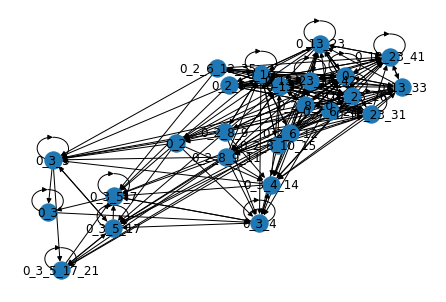

In [68]:
nx.draw(G_test[0.3][9][24],with_labels=True)

## Plot EC Score


In [ ]:
from Genetc import alignment as al
sampleNo=100
stepsBack=24
steps_back=[i for i in range(stepsBack)]
#for q in [0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
#for q in [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
for q in [0.8,0.7,0.6,0.5,0.4,0.3,0.2]:
    nkVec=[]
    testVec=[]
    noautoVec=[]
    randVec=[]
    notimestwoVec=[]
    notimestwonoautoVec=[]
    nonspecificVec=[]
    nkVecMean=[]
    testVecMean=[]
    noautoVecMean=[]
    randVecMean=[]
    notimestwoVecMean=[]
    notimestwonoautoVecMean=[]
    nonspecificVecMean=[]
    nkVecStd=[]
    testVecStd=[]
    noautoVecStd=[]
    randVecStd=[]
    notimestwoVecStd=[]
    notimestwonoautoVecStd=[]
    nonspecificVecStd=[]
    #print(list(graphDict[q][0][-1].nodes))
    for i in steps_back:
        nkVec=[]
        testVec=[]
        noautoVec=[]
        randVec=[]
        notimestwoVec=[]
        notimestwonoautoVec=[]
        nonspecificVec=[]
        print(i)
        for k in range(sampleNo):
            
            nkVec.append(al.quick_ec_score(G_nk[q][k][i],graphDict[q][k][-i-2]))
            #noautoVec.append(al.quick_ec_score(G_noauto[q][k][i],graphDict[q][k][-i-2]))
            testVec.append(al.quick_ec_score(G_test[q][k][i],graphDict[q][k][-i-2]))
            randVec.append(al.quick_ec_score(G_rand[q][k][i],graphDict[q][k][-i-2]))
            #notimestwoVec.append(al.quick_ec_score(G_notimestwo[q][k][i],graphDict[q][k][-i-2]))
            #notimestwonoautoVec.append(al.quick_ec_score(G_notimestwonoauto[q][k][i],graphDict[q][k][-i-2]))
            #nonspecificVec.append(al.quick_ec_score(G_nonspecific[q][k][i],graphDict[q][1][-i-2]))
        nkVecMean.append(np.mean(nkVec))
        nkVecStd.append(np.std(nkVec,ddof=1))
        
        testVecMean.append(np.mean(testVec))
        testVecStd.append(np.std(testVec,ddof=1))

        #noautoVecMean.append(np.mean(noautoVec))
        #noautoVecStd.append(np.std(noautoVec,ddof=1))
        
        randVecMean.append(np.mean(randVec))
        randVecStd.append(np.std(randVec,ddof=1))

        #notimestwoVecMean.append(np.mean(notimestwoVec))
        #notimestwoVecStd.append(np.std(notimestwoVec,ddof=1))

        #notimestwonoautoVecMean.append(np.mean(notimestwonoautoVec))
        #notimestwonoautoVecStd.append(np.std(notimestwonoautoVec,ddof=1))

        #nonspecificVecMean.append(np.mean(nonspecificVec))
        #nonspecificVecStd.append(np.std(nonspecificVec,ddof=1))

    #print(nkVecMean)
    #print(noautoVecMean)
    nkVecStdUp=[nkVecMean[i]+ 1.96*nkVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    nkVecStdDown=[nkVecMean[i]-1.96*nkVecStd[i]/np.sqrt(sampleNo) for i in range(24)]

    testVecStdUp=[testVecMean[i]+1.96*testVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    testVecStdDown=[testVecMean[i]-1.96*testVecStd[i]/np.sqrt(sampleNo) for i in range(24)]

    #noautoVecStdUp=[noautoVecMean[i]+1.96*noautoVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    #noautoVecStdDown=[noautoVecMean[i]-1.96*noautoVecStd[i]/np.sqrt(sampleNo) for i in range(24)]

    randVecStdUp=[randVecMean[i]+1.96*randVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    randVecStdDown=[randVecMean[i]-1.96*randVecStd[i]/np.sqrt(sampleNo) for i in range(24)]

    #notimestwoVecStdUp=[notimestwoVecMean[i]+1.96*notimestwoVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    #notimestwoVecStdDown=[notimestwoVecMean[i]-1.96*notimestwoVecStd[i]/np.sqrt(sampleNo) for i in range(24)]

    #notimestwonoautoVecStdUp=[notimestwonoautoVecMean[i]+1.96*notimestwonoautoVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    #notimestwonoautoVecStdDown=[notimestwonoautoVecMean[i]-1.96*notimestwonoautoVecStd[i]/np.sqrt(sampleNo) for i in range(24)]

    #nonspecificVecStdUp=[nonspecificVecMean[i]+1.96*nonspecificVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    #nonspecificVecStdDown=[nonspecificVecMean[i]-1.96*nonspecificVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    font = {'size'   : 22}
    plt.rc('font', **font)
    plt.figure(figsize=(20,14))
    plt.plot(steps_back,nkVecMean,label="orig")
    plt.plot(steps_back,testVecMean,label="fixed")
    #plt.plot(steps_back,noautoVecMean,label="noauto")
    plt.plot(steps_back,randVecMean,label="rand")
    #plt.plot(steps_back,notimestwoVecMean,label="notimestwo")
    #plt.plot(steps_back,notimestwonoautoVecMean,label="notimestwonoauto")
    #plt.plot(steps_back,nonspecificVecMean,label="nonspecific")
    '''
    plt.plot(steps_back,nkVecStdUp,label="orig")
    plt.plot(steps_back,testVecStdUp,label="fixed")
    plt.plot(steps_back,noautoVecStdUp,label="noauto")
    plt.plot(steps_back,randVecStdUp,label="rand")
    plt.plot(steps_back,notimestwoVecStdUp,label="notimestwo")

    plt.plot(steps_back,nkVecStdDown,label="orig")
    plt.plot(steps_back,testVecStdDown,label="fixed")
    plt.plot(steps_back,noautoVecStdDown,label="noauto")
    plt.plot(steps_back,randVecStdDown,label="rand")
    plt.plot(steps_back,notimestwoVecStdDown,label="notimestwo")
    '''
    plt.fill_between(steps_back, nkVecStdDown, nkVecStdUp, color='b', alpha=.1)
    plt.fill_between(steps_back, testVecStdDown, testVecStdUp, color='g', alpha=.1)
    #plt.fill_between(steps_back, noautoVecStdDown, noautoVecStdUp, color='y', alpha=.1)
    plt.fill_between(steps_back, randVecStdDown, randVecStdUp, color='c', alpha=.1)
    #plt.fill_between(steps_back, notimestwoVecStdDown, notimestwoVecStdUp, color='brown', alpha=.1)
    #plt.fill_between(steps_back, notimestwonoautoVecStdDown, notimestwonoautoVecStdUp, color='m', alpha=.1)
    #plt.fill_between(steps_back, nonspecificVecStdDown, nonspecificVecStdUp, color='r', alpha=.1)
    plt.xlabel("Steps back")
    plt.ylabel("Percentage correct edges of true graph")
    plt.title("Percent edge correctness for fixed vs original likelihood functions q="+str(q))
    plt.legend()
    plt.savefig('likelihood_test/'+seedType+'_seed/'+decideType+"_decide/likelihood_function_comparison_"+str(q)+".pdf")
    #plt.show()
'''
for i in range(24):
    #print(len(G_nk[0.5][0][i].nodes))
    print(set(G_test[q][0][i].nodes).difference(set(G_test[q][0][i+1].nodes)))
    print(list(graphDict[q][0][-i-1].nodes)[-1])

for i in range(25):
    print(al.ec_score(G_test[q][0][i],graphDict[q][0][-i-2])-al.ec_score(G_nk[q][0][i],graphDict[q][0][-i-2]))
print("------------------------------")
for i in range(25):
    print(al.ec_score(G_nk[q][0][i],graphDict[q][0][-i-2]))
print("------------------------------")
for i in range(25):
    print(al.ec_score(G_test[q][0][i],graphDict[q][0][-i-2]))
'''

## Plot Kendalls Tau


In [ ]:
from Genetc import alignment as al
from Genetc import ancestral as anc
sampleNo=100
stepsBack=24

q_vals=[0.8,0.7,0.6,0.5,0.4,0.3,0.2]
qVals=len(q_vals)
steps_back=[i for i in range(stepsBack)]
plt.figure(figsize=(20,14))
nkVecMean=[]
testVecMean=[]
noautoVecMean=[]
randVecMean=[]
notimestwoVecMean=[]
notimestwonoautoVecMean=[]
nonspecificVecMean=[]
nkVecStd=[]
testVecStd=[]
noautoVecStd=[]
randVecStd=[]
notimestwoVecStd=[]
notimestwonoautoVecStd=[]
nonspecificVecStd=[]

for q in q_vals:
    nkVec=[]
    testVec=[]
    randVec=[]
    noautoVec=[]
    notimestwoVec=[]
    notimestwonoautoVec=[]
    nonspecificVec=[]
    
    print(q)
    for k in range(sampleNo):
        seedVector=[{i} for i in graphDict[q][k][24].nodes()]
        print(seedVector)
        A_nk=[]
        A_test=[]
        A_rand=[]
        A_noauto=[]
        A_notimestwo=[]
        A_notimestwonoauto=[]
        A_nonspecific=[]
        A_true=[]
        A_nk.append(set(graphDict[q][k][-1].nodes).difference(set(G_nk[q][k][0].nodes)))
        A_test.append(set(graphDict[q][k][-1].nodes).difference(set(G_test[q][k][0].nodes)))
        A_rand.append(set(graphDict[q][k][-1].nodes).difference(set(G_rand[q][k][0].nodes)))
        #A_noauto.append(set(graphDict[q][k][-1].nodes).difference(set(G_noauto[q][k][0].nodes)))
        #A_notimestwo.append(set(graphDict[q][k][-1].nodes).difference(set(G_notimestwo[q][k][0].nodes)))
        #A_notimestwonoauto.append(set(graphDict[q][k][-1].nodes).difference(set(G_notimestwonoauto[q][k][0].nodes)))
        #A_nonspecific.append(set(graphDict[q][k][-1].nodes).difference(set(G_nonspecific[q][k][0].nodes)))
        A_true.append(set(graphDict[q][k][-1].nodes).difference(set(graphDict[q][k][-2].nodes)))
        
        for i in range(stepsBack):
            A_true.append(set(graphDict[q][k][-i-2].nodes).difference(set(graphDict[q][k][-i-3].nodes)))
            
            A_test.append(set(G_test[q][k][i].nodes).difference(set(G_test[q][k][i+1].nodes)))
            A_nk.append(set(G_nk[q][k][i].nodes).difference(set(G_nk[q][k][i+1].nodes)))
            A_rand.append(set(G_rand[q][k][i].nodes).difference(set(G_rand[q][k][i+1].nodes)))
            #A_noauto.append(set(G_noauto[q][k][i].nodes).difference(set(G_noauto[q][k][i+1].nodes)))
            #A_notimestwo.append(set(G_notimestwo[q][k][i].nodes).difference(set(G_notimestwo[q][k][i+1].nodes)))
            #A_notimestwonoauto.append(set(G_notimestwonoauto[q][k][i].nodes).difference(set(G_notimestwonoauto[q][k][i+1].nodes)))
            #A_nonspecific.append(set(G_nonspecific[q][k][i].nodes).difference(set(G_nonspecific[q][k][i+1].nodes)))
        #for i in range(len(graphDict[q][k])):
        #    A_true.append(set(graphDict[q][k][i-1].nodes).difference(set(graphDict[q][k][i-2].nodes)))
        print(A_true,A_rand)
        #print(A_true,seedVector)
        nkVec.append(anc.kendalls_tau(A_nk,A_true,count_all=False,useSeedVector=True,seedVector=seedVector,orderedSeed=True))
        testVec.append(anc.kendalls_tau(A_test,A_true,count_all=False,useSeedVector=True,seedVector=seedVector,orderedSeed=True))
        randVec.append(anc.kendalls_tau(A_rand,A_true,count_all=False,useSeedVector=True,seedVector=seedVector,orderedSeed=True))
        #noautoVec.append(anc.kendalls_tau(A_noauto,A_true,count_all=False,useSeedVector=True,seedVector=seedVector))
        #notimestwoVec.append(anc.kendalls_tau(A_notimestwo,A_true,count_all=False,useSeedVector=True,seedVector=seedVector))
        #notimestwonoautoVec.append(anc.kendalls_tau(A_notimestwonoauto,A_true,count_all=False,useSeedVector=True,seedVector=seedVector))
        #nonspecificVec.append(anc.kendalls_tau(A_nonspecific,A_true,count_all=False,useSeedVector=True,seedVector=seedVector,orderedSeed=True))
    nkVecMean.append(np.mean(nkVec))
    #print(nkVec)
    nkVecStd.append(np.std(nkVec,ddof=1))
        
    testVecMean.append(np.mean(testVec))
    testVecStd.append(np.std(testVec,ddof=1))

    randVecMean.append(np.mean(randVec))
    randVecStd.append(np.std(randVec,ddof=1))

    #noautoVecMean.append(np.mean(noautoVec))
    #noautoVecStd.append(np.std(noautoVec,ddof=1))

    #notimestwoVecMean.append(np.mean(notimestwoVec))
    #notimestwoVecStd.append(np.std(notimestwoVec,ddof=1))

    #notimestwonoautoVecMean.append(np.mean(notimestwonoautoVec))
    #notimestwonoautoVecStd.append(np.std(notimestwonoautoVec,ddof=1))

    #nonspecificVecMean.append(np.mean(nonspecificVec))
    #nonspecificVecStd.append(np.std(nonspecificVec,ddof=1))
nkVecStdUp=[nkVecMean[i]+ 1.96*nkVecStd[i]/np.sqrt(sampleNo) for i in range(qVals)]
#print("len",nkVecStdUp)
nkVecStdDown=[nkVecMean[i]-1.96*nkVecStd[i]/np.sqrt(sampleNo) for i in range(qVals)]
testVecStdUp=[testVecMean[i]+1.96*testVecStd[i]/np.sqrt(sampleNo) for i in range(qVals)]
testVecStdDown=[testVecMean[i]-1.96*testVecStd[i]/np.sqrt(sampleNo) for i in range(qVals)]
randVecStdUp=[randVecMean[i]+1.96*randVecStd[i]/np.sqrt(sampleNo) for i in range(qVals)]
randVecStdDown=[randVecMean[i]-1.96*randVecStd[i]/np.sqrt(sampleNo) for i in range(qVals)]
#noautoVecStdUp=[noautoVecMean[i]+1.96*noautoVecStd[i]/np.sqrt(sampleNo) for i in range(qVals)]
#noautoVecStdDown=[noautoVecMean[i]-1.96*noautoVecStd[i]/np.sqrt(sampleNo) for i in range(qVals)]
#notimestwoVecStdUp=[notimestwoVecMean[i]+1.96*notimestwoVecStd[i]/np.sqrt(sampleNo) for i in range(qVals)]
#notimestwoVecStdDown=[notimestwoVecMean[i]-1.96*notimestwoVecStd[i]/np.sqrt(sampleNo) for i in range(qVals)]
#notimestwonoautoVecStdUp=[notimestwonoautoVecMean[i]+1.96*notimestwonoautoVecStd[i]/np.sqrt(sampleNo) for i in range(qVals)]
#notimestwonoautoVecStdDown=[notimestwonoautoVecMean[i]-1.96*notimestwonoautoVecStd[i]/np.sqrt(sampleNo) for i in range(qVals)]
#nonspecificVecStdUp=[nonspecificVecMean[i]+1.96*nonspecificVecStd[i]/np.sqrt(sampleNo) for i in range(qVals)]
#nonspecificVecStdDown=[nonspecificVecMean[i]-1.96*nonspecificVecStd[i]/np.sqrt(sampleNo) for i in range(qVals)]
'''
q_vals=[0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]

print(nkVecMean)
nkVecMean.append(nkVecMean.pop(nkVecMean.index(nkVecMean[0])))
testVecMean.append(testVecMean.pop(testVecMean.index(testVecMean[0])))
randVecMean.append(randVecMean.pop(randVecMean.index(randVecMean[0])))
noautoVecMean.append(noautoVecMean.pop(noautoVecMean.index(noautoVecMean[0])))
notimestwoVecMean.append(notimestwoVecMean.pop(notimestwoVecMean.index(notimestwoVecMean[0])))
notimestwonoautoVecMean.append(notimestwonoautoVecMean.pop(notimestwonoautoVecMean.index(notimestwonoautoVecMean[0])))
nkVecStdUp.append(nkVecStdUp.pop(nkVecStdUp.index(nkVecStdUp[0])))
nkVecStdDown.append(nkVecStdDown.pop(nkVecStdDown.index(nkVecStdDown[0])))
testVecStdUp.append(testVecStdUp.pop(testVecStdUp.index(testVecStdUp[0])))
testVecStdDown.append(testVecStdDown.pop(testVecStdDown.index(testVecStdDown[0])))
randVecStdUp.append(randVecStdUp.pop(randVecStdUp.index(randVecStdUp[0])))
randVecStdDown.append(randVecStdDown.pop(randVecStdDown.index(randVecStdDown[0])))
noautoVecStdUp.append(noautoVecStdUp.pop(noautoVecStdUp.index(noautoVecStdUp[0])))
noautoVecStdDown.append(noautoVecStdDown.pop(noautoVecStdDown.index(noautoVecStdDown[0])))
notimestwoVecStdUp.append(notimestwoVecStdUp.pop(notimestwoVecStdUp.index(notimestwoVecStdUp[0])))
notimestwoVecStdDown.append(notimestwoVecStdDown.pop(notimestwoVecStdDown.index(notimestwoVecStdDown[0])))
notimestwonoautoVecStdUp.append(notimestwonoautoVecStdUp.pop(notimestwonoautoVecStdUp.index(notimestwonoautoVecStdUp[0])))
notimestwonoautoVecStdDown.append(notimestwonoautoVecStdDown.pop(notimestwonoautoVecStdDown.index(notimestwonoautoVecStdDown[0])))
nonspecificVecStdUp.append(nonspecificVecStdUp.pop(nonspecificVecStdUp.index(nonspecificVecStdUp[0])))
nonspecificVecStdDown.append(nonspecificVecStdDown.pop(nonspecificVecStdDown.index(nonspecificVecStdDown[0])))
'''
font = {'size'   : 22}
plt.rc('font', **font)   
plt.plot(q_vals,nkVecMean,label="orig",color="b",marker="o")
plt.plot(q_vals,testVecMean,label="fixed",color="orange",marker="o")
plt.plot(q_vals,randVecMean,label="rand",color="g",marker="o")
#plt.plot(q_vals,noautoVecMean,label="noauto")
#plt.plot(q_vals,notimestwoVecMean,label="notimestwo")
#plt.plot(q_vals,notimestwonoautoVecMean,label="notimestwonoauto")
#plt.plot(q_vals,nonspecificVecMean,label="nonspecific",color="r",marker="o")
#plt.plot(steps_back,nkVecStdUp,label="orig")
#plt.plot(steps_back,testVecStdUp,label="fixed")
#plt.plot(steps_back,nkVecStdDown,label="orig")
#plt.plot(steps_back,testVecStdDown,label="fixed")
plt.fill_between(q_vals, nkVecStdDown, nkVecStdUp, color='b', alpha=.1)
plt.fill_between(q_vals, testVecStdDown, testVecStdUp, color='orange', alpha=.1)
plt.fill_between(q_vals, randVecStdDown, randVecStdUp, color='g', alpha=.1)
#plt.fill_between(q_vals, noautoVecStdDown, noautoVecStdUp, color='y', alpha=.1)
#plt.fill_between(q_vals, notimestwoVecStdDown, notimestwoVecStdUp, color='c', alpha=.1)
#plt.fill_between(q_vals, notimestwonoautoVecStdDown, notimestwonoautoVecStdUp, color='m', alpha=.1)
#plt.fill_between(q_vals, nonspecificVecStdDown, nonspecificVecStdUp, color='r', alpha=.1)
plt.xlabel("q")
plt.ylabel("Kendalls Tau")
plt.title("Kendalls Tau for fixed vs original likelihood functions")
plt.legend()
plt.savefig('likelihood_test/'+seedType+'_seed/'+decideType+"_decide/kendalls_likelihood_function_comparison_"+".pdf")
#plt.show()
'''
for i in range(24):
    #print(len(G_nk[0.5][0][i].nodes))
    print(set(G_test[q][0][i].nodes).difference(set(G_test[q][0][i+1].nodes)))
    print(list(graphDict[q][0][-i-1].nodes)[-1])

for i in range(25):
    print(al.ec_score(G_test[q][0][i],graphDict[q][0][-i-2])-al.ec_score(G_nk[q][0][i],graphDict[q][0][-i-2]))
print("------------------------------")
for i in range(25):
    print(al.ec_score(G_nk[q][0][i],graphDict[q][0][-i-2]))
print("------------------------------")
for i in range(25):
    print(al.ec_score(G_test[q][0][i],graphDict[q][0][-i-2]))
'''

## Plot Graph Profile

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


'\nfor i in range(24):\n    #print(len(G_nk[0.5][0][i].nodes))\n    print(set(G_test[q][0][i].nodes).difference(set(G_test[q][0][i+1].nodes)))\n    print(list(graphDict[q][0][-i-1].nodes)[-1])\n\nfor i in range(25):\n    print(al.ec_score(G_test[q][0][i],graphDict[q][0][-i-2])-al.ec_score(G_nk[q][0][i],graphDict[q][0][-i-2]))\nprint("------------------------------")\nfor i in range(25):\n    print(al.ec_score(G_nk[q][0][i],graphDict[q][0][-i-2]))\nprint("------------------------------")\nfor i in range(25):\n    print(al.ec_score(G_test[q][0][i],graphDict[q][0][-i-2]))\n'

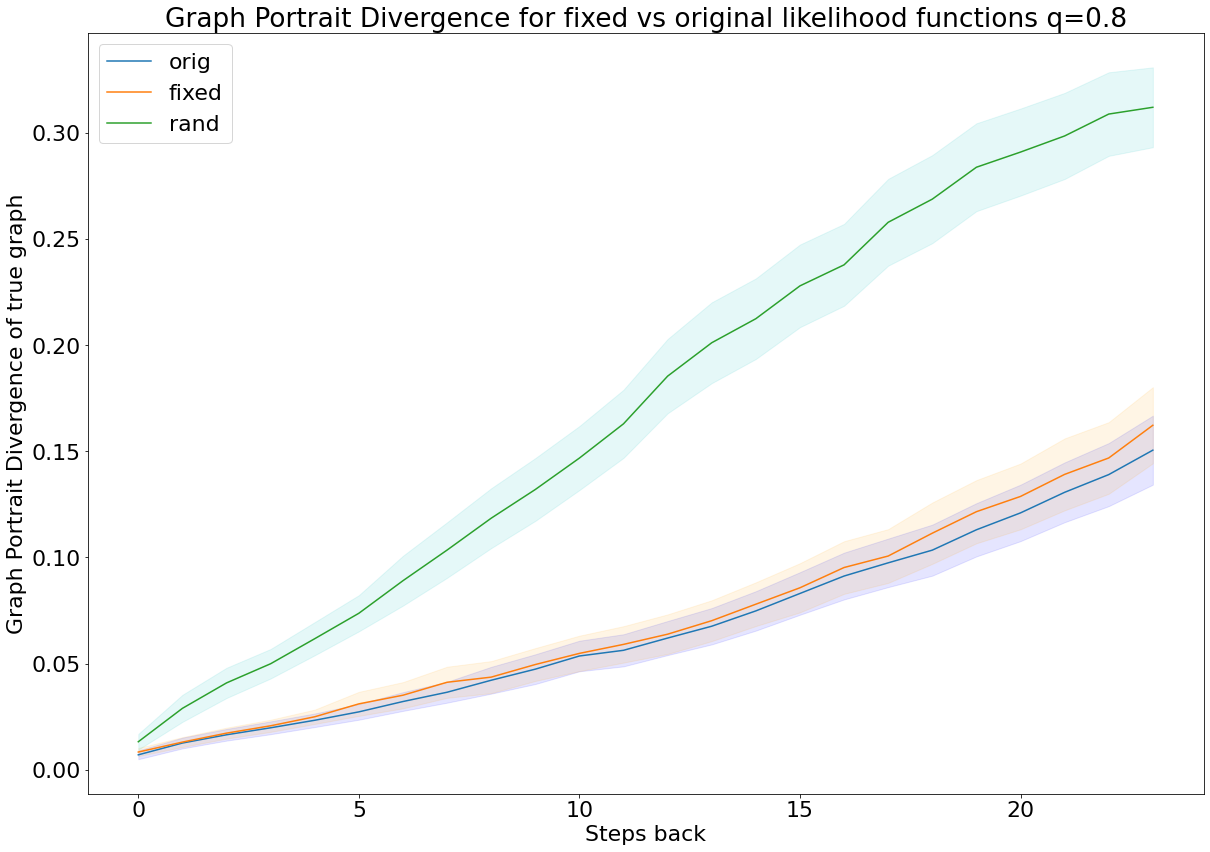

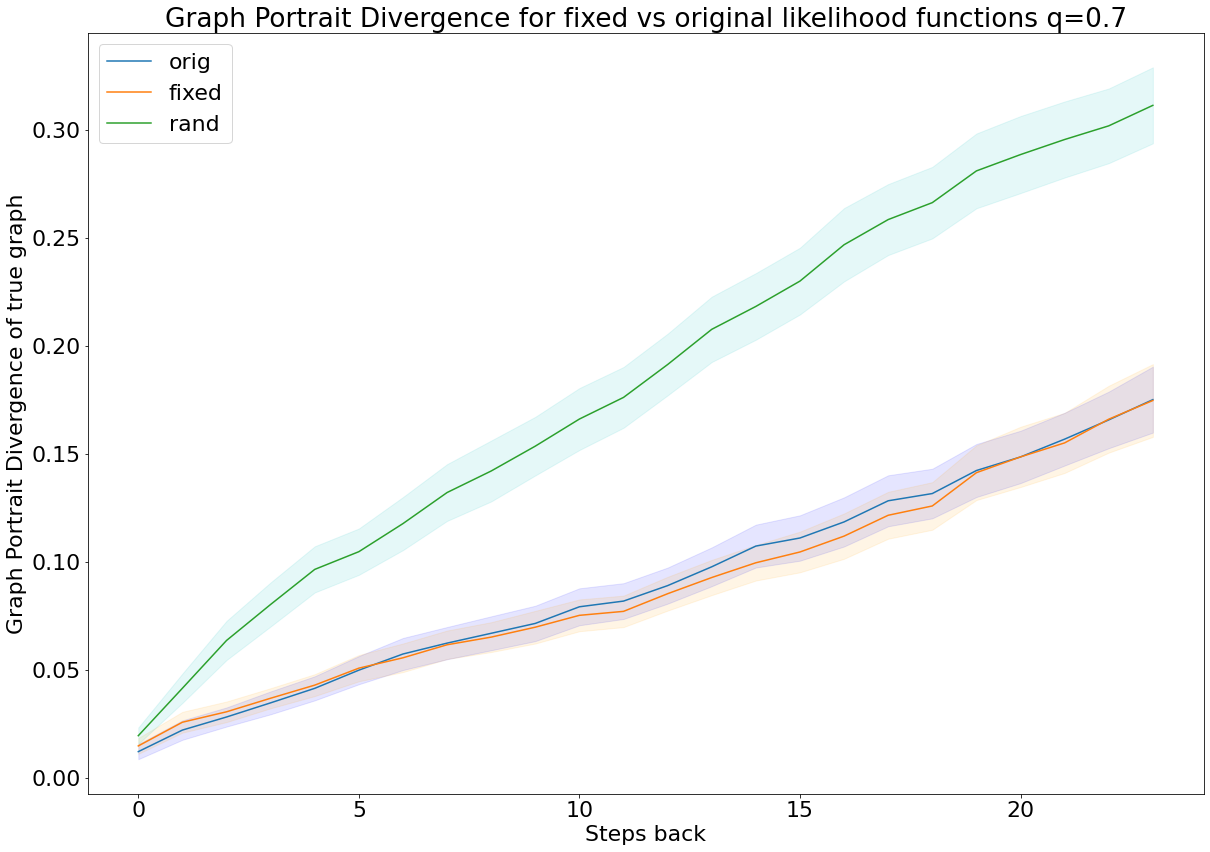

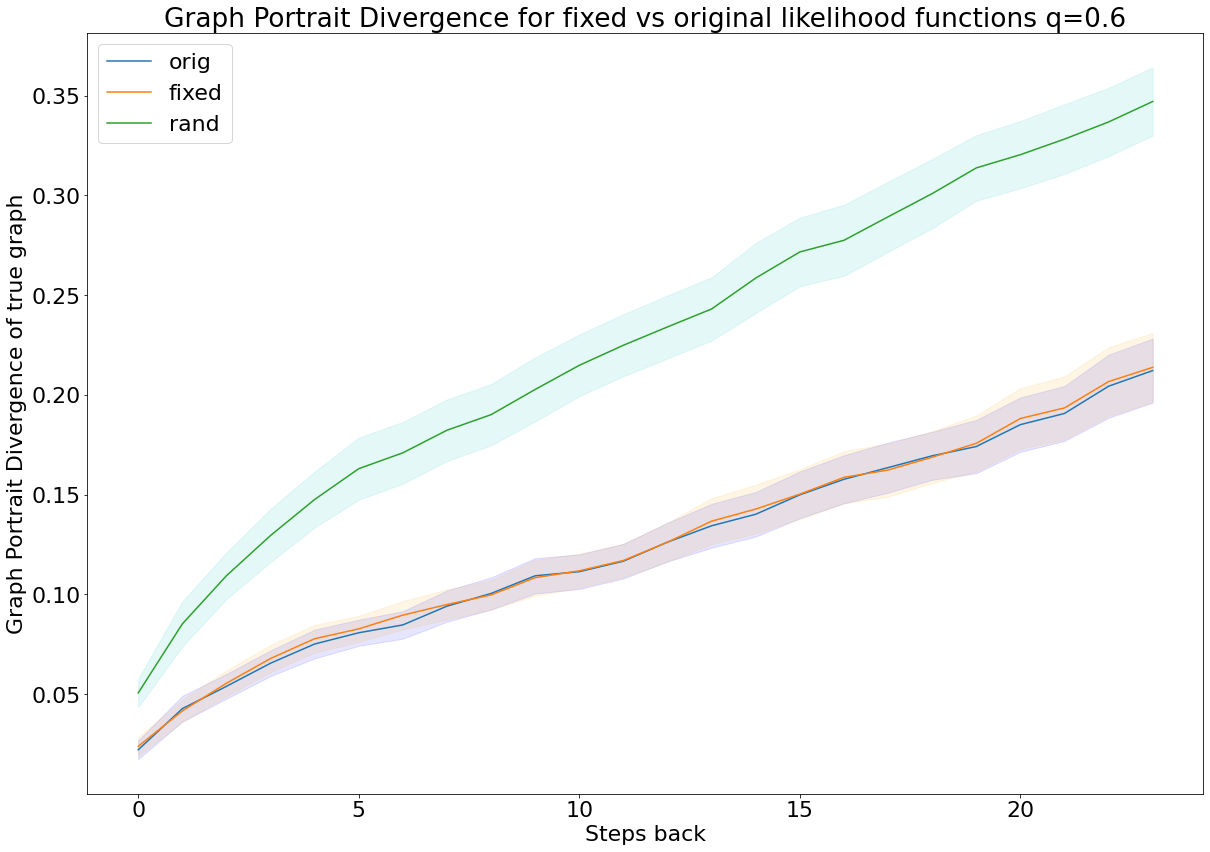

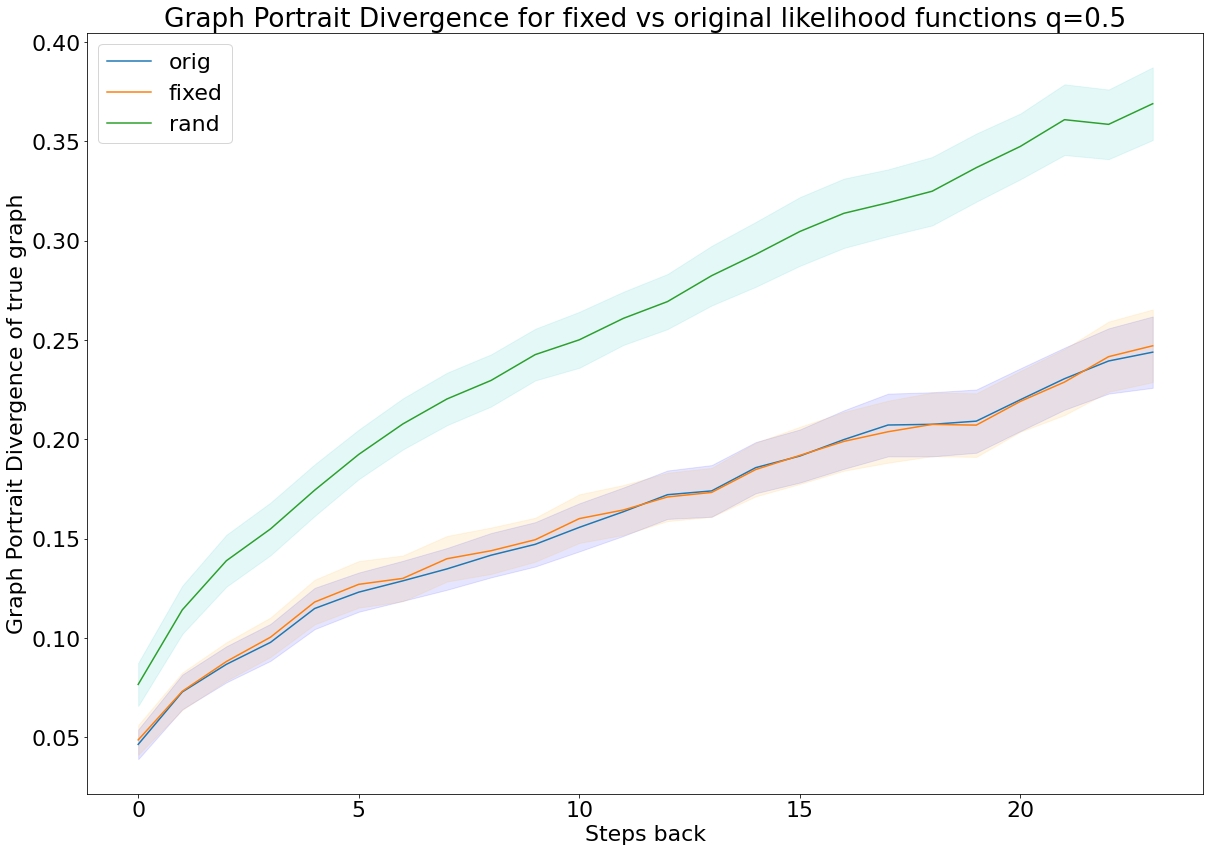

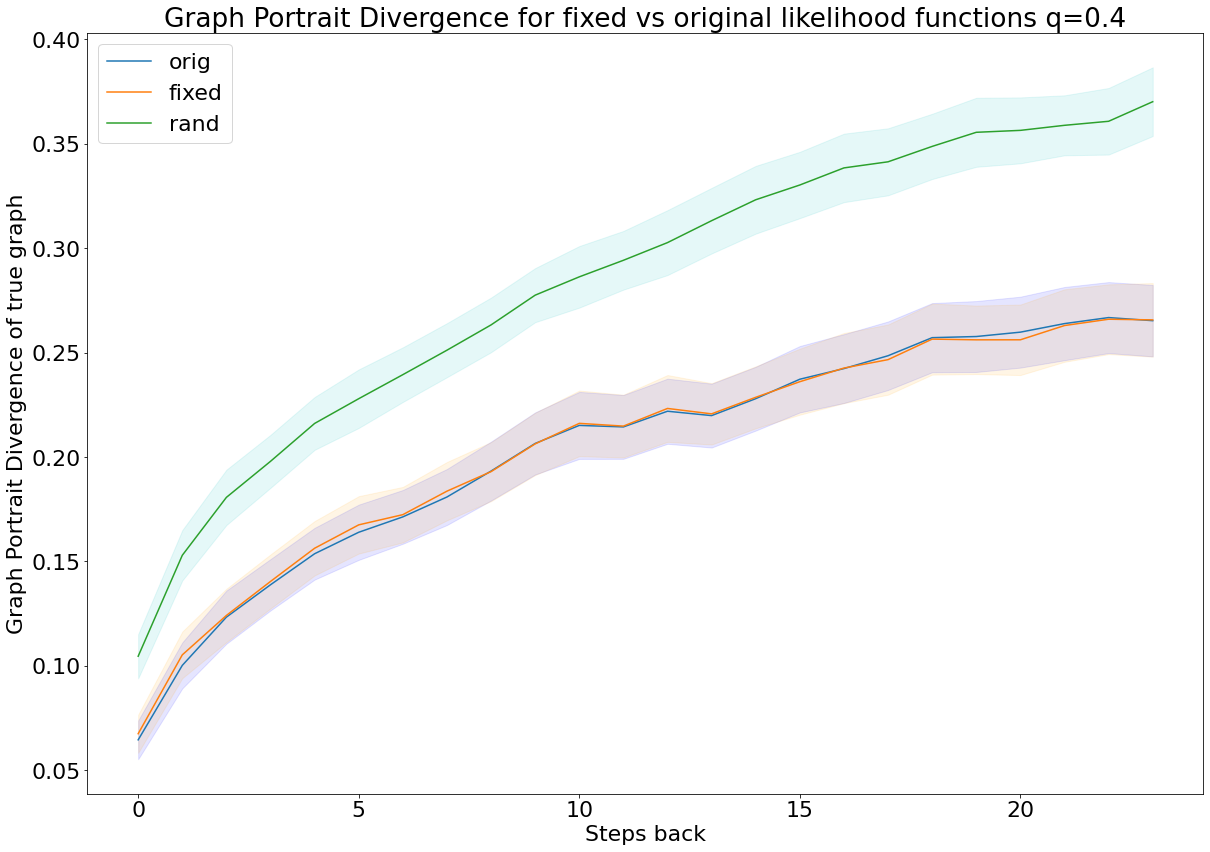

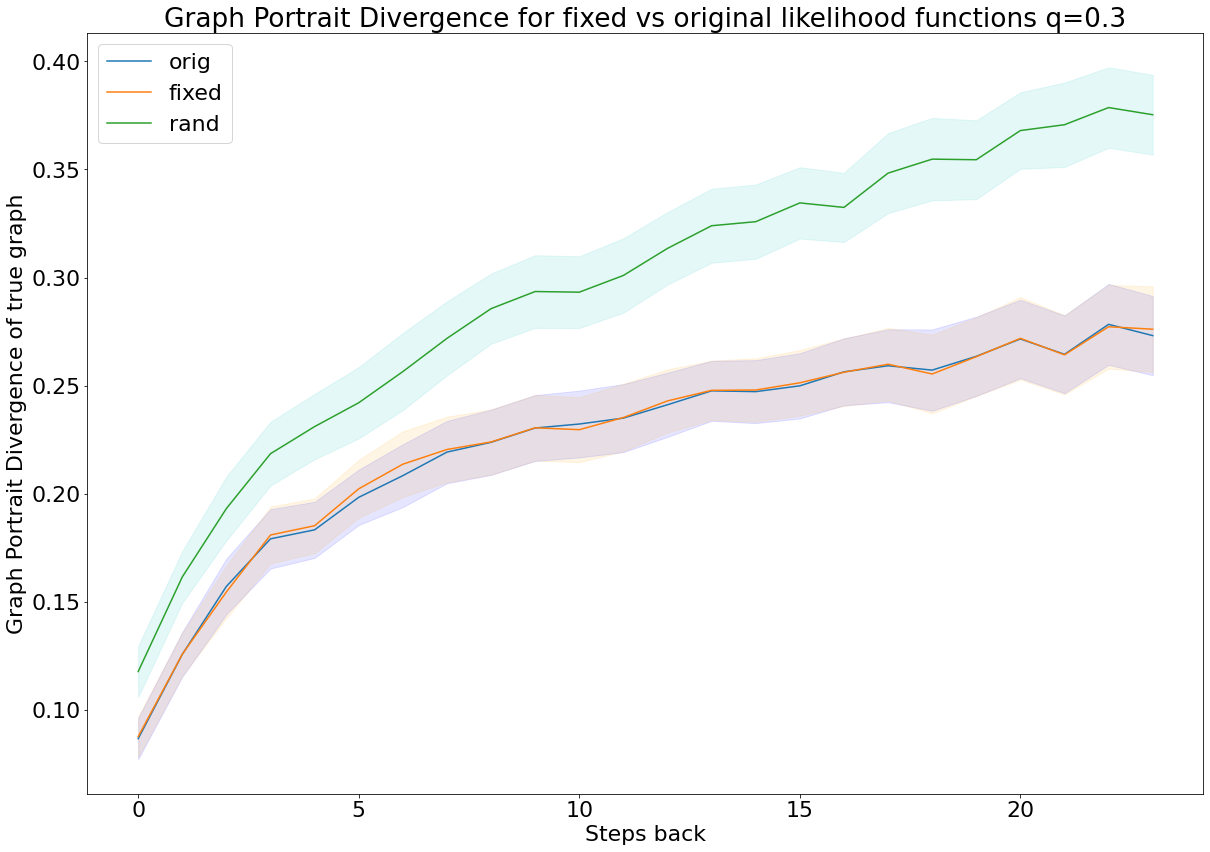

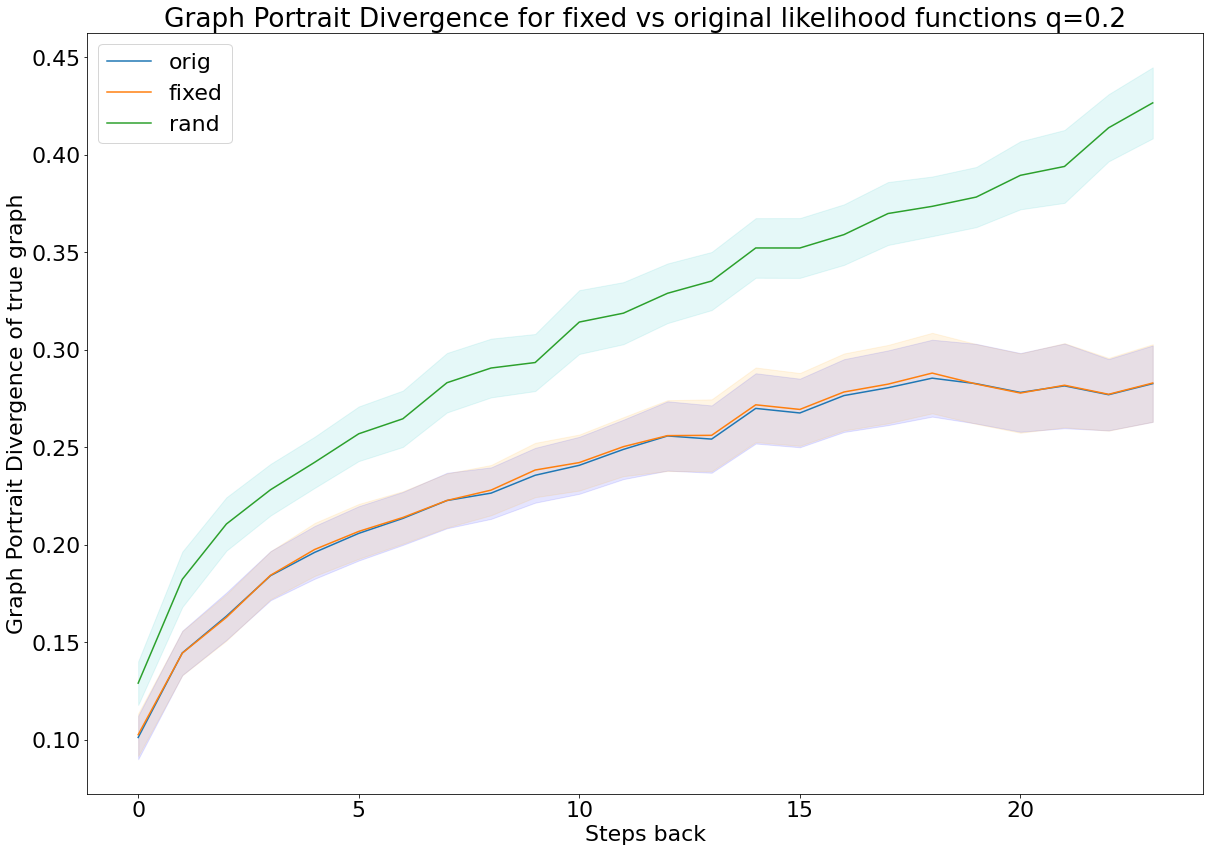

In [14]:
from Genetc import alignment as al
import netrd as nrd

sampleNo=100
stepsBack=24
steps_back=[i for i in range(stepsBack)]
#for q in [0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
#for q in [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
for q in [0.8,0.7,0.6,0.5,0.4,0.3,0.2]:
    nkVec=[]
    testVec=[]
    noautoVec=[]
    randVec=[]
    notimestwoVec=[]
    notimestwonoautoVec=[]
    nonspecificVec=[]
    nkVecMean=[]
    testVecMean=[]
    noautoVecMean=[]
    randVecMean=[]
    notimestwoVecMean=[]
    notimestwonoautoVecMean=[]
    nonspecificVecMean=[]
    nkVecStd=[]
    testVecStd=[]
    noautoVecStd=[]
    randVecStd=[]
    notimestwoVecStd=[]
    notimestwonoautoVecStd=[]
    nonspecificVecStd=[]
    #print(list(graphDict[q][0][-1].nodes))
    for i in steps_back:
        nkVec=[]
        testVec=[]
        noautoVec=[]
        randVec=[]
        notimestwoVec=[]
        notimestwonoautoVec=[]
        nonspecificVec=[]
        print(i)
        for k in range(sampleNo):
            
            nkVec.append(nrd.distance.portrait_divergence.portrait_divergence(G_nk[q][k][i],graphDict[q][k][-i-2]))
            testVec.append(nrd.distance.portrait_divergence.portrait_divergence(G_test[q][k][i],graphDict[q][k][-i-2]))
            #noautoVec.append(nrd.distance.portrait_divergence.portrait_divergence(G_noauto[q][k][i],graphDict[q][k][-i-2]))
            randVec.append(nrd.distance.portrait_divergence.portrait_divergence(G_rand[q][k][i],graphDict[q][k][-i-2]))
            #notimestwoVec.append(nrd.distance.portrait_divergence.portrait_divergence(G_notimestwo[q][k][i],graphDict[q][k][-i-2]))
            #notimestwonoautoVec.append(nrd.distance.portrait_divergence.portrait_divergence(G_notimestwonoauto[q][k][i],graphDict[q][k][-i-2]))
            #nonspecificVec.append(nrd.distance.portrait_divergence.portrait_divergence(G_nonspecific[q][k][i],graphDict[q][k][-i-2]))
            
        nkVecMean.append(np.mean(nkVec))
        nkVecStd.append(np.std(nkVec,ddof=1))
        
        testVecMean.append(np.mean(testVec))
        testVecStd.append(np.std(testVec,ddof=1))

        #noautoVecMean.append(np.mean(noautoVec))
        #noautoVecStd.append(np.std(noautoVec,ddof=1))
        
        randVecMean.append(np.mean(randVec))
        randVecStd.append(np.std(randVec,ddof=1))

        #notimestwoVecMean.append(np.mean(notimestwoVec))
        #notimestwoVecStd.append(np.std(notimestwoVec,ddof=1))

        #notimestwonoautoVecMean.append(np.mean(notimestwonoautoVec))
        #notimestwonoautoVecStd.append(np.std(notimestwonoautoVec,ddof=1))

        #nonspecificVecMean.append(np.mean(nonspecificVec))
        #nonspecificVecStd.append(np.std(nonspecificVec,ddof=1))

    #print(nkVecMean)
    #print(noautoVecMean)
    nkVecStdUp=[nkVecMean[i]+ 1.96*nkVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    nkVecStdDown=[nkVecMean[i]-1.96*nkVecStd[i]/np.sqrt(sampleNo) for i in range(24)]

    testVecStdUp=[testVecMean[i]+1.96*testVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    testVecStdDown=[testVecMean[i]-1.96*testVecStd[i]/np.sqrt(sampleNo) for i in range(24)]

    #noautoVecStdUp=[noautoVecMean[i]+1.96*noautoVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    #noautoVecStdDown=[noautoVecMean[i]-1.96*noautoVecStd[i]/np.sqrt(sampleNo) for i in range(24)]

    randVecStdUp=[randVecMean[i]+1.96*randVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    randVecStdDown=[randVecMean[i]-1.96*randVecStd[i]/np.sqrt(sampleNo) for i in range(24)]

    #notimestwoVecStdUp=[notimestwoVecMean[i]+1.96*notimestwoVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    #notimestwoVecStdDown=[notimestwoVecMean[i]-1.96*notimestwoVecStd[i]/np.sqrt(sampleNo) for i in range(24)]

    #notimestwonoautoVecStdUp=[notimestwonoautoVecMean[i]+1.96*notimestwonoautoVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    #notimestwonoautoVecStdDown=[notimestwonoautoVecMean[i]-1.96*notimestwonoautoVecStd[i]/np.sqrt(sampleNo) for i in range(24)]

    #nonspecificVecStdUp=[nonspecificVecMean[i]+1.96*nonspecificVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    #nonspecificVecStdDown=[nonspecificVecMean[i]-1.96*nonspecificVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    font = {'size'   : 22}
    plt.rc('font', **font)
    plt.figure(figsize=(20,14))
    plt.plot(steps_back,nkVecMean,label="orig")
    plt.plot(steps_back,testVecMean,label="fixed")
    #plt.plot(steps_back,noautoVecMean,label="noauto")
    plt.plot(steps_back,randVecMean,label="rand")
    #plt.plot(steps_back,notimestwoVecMean,label="notimestwo")
    #plt.plot(steps_back,notimestwonoautoVecMean,label="notimestwonoauto")
    #plt.plot(steps_back,nonspecificVecMean,label="nonspecific")
    '''
    plt.plot(steps_back,nkVecStdUp,label="orig")
    plt.plot(steps_back,testVecStdUp,label="fixed")
    plt.plot(steps_back,noautoVecStdUp,label="noauto")
    plt.plot(steps_back,randVecStdUp,label="rand")
    plt.plot(steps_back,notimestwoVecStdUp,label="notimestwo")

    plt.plot(steps_back,nkVecStdDown,label="orig")
    plt.plot(steps_back,testVecStdDown,label="fixed")
    plt.plot(steps_back,noautoVecStdDown,label="noauto")
    plt.plot(steps_back,randVecStdDown,label="rand")
    plt.plot(steps_back,notimestwoVecStdDown,label="notimestwo")
    '''
    plt.fill_between(steps_back, nkVecStdDown, nkVecStdUp, color='b', alpha=.1)
    plt.fill_between(steps_back, testVecStdDown, testVecStdUp, color='orange', alpha=.1)
    #plt.fill_between(steps_back, noautoVecStdDown, noautoVecStdUp, color='y', alpha=.1)
    plt.fill_between(steps_back, randVecStdDown, randVecStdUp, color='c', alpha=.1)
    #plt.fill_between(steps_back, notimestwoVecStdDown, notimestwoVecStdUp, color='brown', alpha=.1)
    #plt.fill_between(steps_back, notimestwonoautoVecStdDown, notimestwonoautoVecStdUp, color='m', alpha=.1)
    #plt.fill_between(steps_back, nonspecificVecStdDown, nonspecificVecStdUp, color='r', alpha=.1)
    plt.xlabel("Steps back")
    plt.ylabel("Graph Portrait Divergence of true graph")
    plt.title("Graph Portrait Divergence for fixed vs original likelihood functions q="+str(q))
    plt.legend()
    plt.savefig('likelihood_test/'+seedType+'_seed/'+decideType+"_decide/likelihood_function_comparison_portrait_"+str(q)+".pdf")
    #plt.show()
'''
for i in range(24):
    #print(len(G_nk[0.5][0][i].nodes))
    print(set(G_test[q][0][i].nodes).difference(set(G_test[q][0][i+1].nodes)))
    print(list(graphDict[q][0][-i-1].nodes)[-1])

for i in range(25):
    print(al.ec_score(G_test[q][0][i],graphDict[q][0][-i-2])-al.ec_score(G_nk[q][0][i],graphDict[q][0][-i-2]))
print("------------------------------")
for i in range(25):
    print(al.ec_score(G_nk[q][0][i],graphDict[q][0][-i-2]))
print("------------------------------")
for i in range(25):
    print(al.ec_score(G_test[q][0][i],graphDict[q][0][-i-2]))
'''

## Simple tests

In [8]:
from Genetc import alignment as al
q=0.2
k=70
count=0
#print(list(graphDict[q][0][-1].nodes))
#plt.figure(figsize=(20,20))
#nx.draw(graphDict[q][k][-1],with_labels=True)
for q in [0.9]:
    for k in [60]:
        #print('nk',set(graphDict[q][k][-1].nodes).difference(set(G_nk[q][k][0].nodes)))
        #print('rand',set(graphDict[q][k][-1].nodes).difference(set(G_rand[q][k][0].nodes)))

        for i in range(24):
            #print(len(G_nk[0.5][0][i].nodes))
            print('notimesTwo',set(G_notimestwo[q][k][i].nodes).difference(set(G_notimestwo[q][k][i+1].nodes)))
            #print('rand',set(G_rand[q][k][i].nodes).difference(set(G_rand[q][k][i+1].nodes)))
            for p in set(G_rand[q][k][i].nodes).difference(set(G_rand[q][k][i+1].nodes)):
                if '_' in list(str(p)):
                    count=count+1
            #print(maxPairsTest[q][k][i+1])
            #print(list(graphDict[q][0][-i-1].nodes)[-1])
print(count/1000)
for i in range(25):
    print(al.quick_ec_score(G_notimestwo[q][k][i],graphDict[q][k][-i-2])-al.quick_ec_score(G_nk[q][k][i],graphDict[q][k][-i-2]))
print("------------------------------")
for i in range(25):
    print(al.quick_ec_score(G_notimestwo[q][k][i],graphDict[q][k][-i-2]))
print(G_noauto[q][k][i].nodes())
print("------------------------------")
for i in range(25):
    print(al.quick_ec_score(G_nk[q][k][i],graphDict[q][k][-i-2]))

notimesTwo {'21_4_9'}
notimesTwo {23}
notimesTwo {'19_18'}
notimesTwo {19}
notimesTwo {2}
notimesTwo {'4_20'}
notimesTwo {'21_4'}
notimesTwo {'4_16'}
notimesTwo {20}
notimesTwo {1}
notimesTwo {21}
notimesTwo {3}
notimesTwo {'0_2_14_17'}
notimesTwo {5}
notimesTwo {'0_2_14_19'}
notimesTwo {24}
notimesTwo {'0_13'}
notimesTwo {11}
notimesTwo {'23_7'}
notimesTwo {'0_2_14'}
notimesTwo {17}
notimesTwo {'0_13_23'}
notimesTwo {22}
notimesTwo {'23_1'}
0.014
-0.0010101010101010166
-0.004802744425385863
-0.009440559440559437
-0.018538324420677377
-0.00545454545454549
-0.019666048237476863
0.005029013539651794
-0.002371541501976271
-0.05858585858585863
0.050000000000000044
0.03890063424947149
0.01601731601731604
0.03281596452328156
-0.009756097560975618
-0.046563192904656325
-0.03477868112014454
-0.03477868112014454
-0.03477868112014454
-0.059168925022583585
-0.015740740740740722
0.04629629629629631
0.052706552706552695
0.038461538461538464
0.009971509971509973
0.009971509971509973
----------------

In [ ]:
from Genetc import alignment as al
steps_back=[i for i in range(24)]
for q in [0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
    nkVecStdUp=[nkVecMean[i]+ 1.96*nkVecStd[i]/10 for i in range(24)]
    #print("len",nkVecStdUp)
    print(np.std(nkVec,ddof=1))
    print(np.mean(nkVec))
    nkVecStdDown=[nkVecMean[i]-1.96*nkVecStd[i]/10 for i in range(24)]
    testVecStdUp=[testVecMean[i]+1.96*testVecStd[i]/10 for i in range(24)]
    testVecStdDown=[testVecMean[i]-1.96*testVecStd[i]/10 for i in range(24)]
    plt.figure(figsize=(20,14))
    plt.plot(steps_back,nkVecMean,label="orig")
    plt.plot(steps_back,testVecMean,label="fixed")
    #plt.plot(steps_back,nkVecStdUp,label="orig")
    #plt.plot(steps_back,testVecStdUp,label="fixed")
    #plt.plot(steps_back,nkVecStdDown,label="orig")
    #plt.plot(steps_back,testVecStdDown,label="fixed")
    plt.fill_between(steps_back, nkVecStdDown, nkVecStdUp, color='b', alpha=.1)
    plt.fill_between(steps_back, testVecStdDown, testVecStdUp, color='r', alpha=.1)
    plt.xlabel("Steps back")
    plt.ylabel("Percentage correct edges of true graph")
    plt.title("Percent edge correctness for fixed vs original likelihood functions q="+str(q))
    plt.legend()
    plt.savefig("likelihood_function_comparison_"+str(q)+".pdf")
    #plt.show()

In [5]:
import oapackage
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import grakel as gk
G=nx.erdos_renyi_graph(100,0.1)
oapackage.reduceGraphNauty(G)


AttributeError: 'Graph' object has no attribute 'shape'

In [ ]:
from Genetc import ancestral as anc
import random


import json as js
#f = open('sorghum.json',)
#data=js.load(f)
#data={"nodes": [{"data": {"id": "a", "label": "Gene1"}},{"data": {"id": "b", "label": "Gene2"}},{"data": {"id": "c", "label": "Gene3"}},{"data": {"id": "d", "label": "Gene4"}},{"data": {"id": "e", "label": "Gene5"}},{"data": {"id": "f", "label": "Gene6"}}],"edges": [{"data": {"id": "ab","source": "a","target": "b"}},{"data": {"id": "cd","source": "c","target": "d"}},{"data": {"id": "ef","source": "e","target": "f"}},{"data": {"id": "ac","source": "a","target": "d"}},{"data": {"id": "be","source": "b","target": "e"}}]        }
#print(data)
print("AAAAAAAAAAAAAAA")
out_deg_dist=dict()
in_deg_dist=dict()
G_col=nx.read_edgelist("E_coli_GRN\E_coli_GRN_edges_only.txt",create_using=nx.DiGraph())
G_col=max(ut.connected_component_subgraphs(G_col),key=len)
G_col=nx.convert_node_labels_to_integers(G_col)
G_coli=nx.DiGraph()
for i in G_col.nodes:
    G_coli.add_node(i)
for i in G_col.edges:
    G_coli.add_edge(i[0],i[1])
for i in G_coli.nodes:
    in_deg_dist[i]=0
    out_deg_dist[i]=0
    for j in G_coli.predecessors(i):
        in_deg_dist[i]=in_deg_dist[i]+1
    for j in G_coli.successors(i):
        out_deg_dist[i]=out_deg_dist[i]+1

inList=list(in_deg_dist.values())
outList=list(out_deg_dist.values())
inList=sorted(inList)
outList=sorted(outList)


decideType='random'
#decideType='max_EC'
#decideType='max_likelihood'
#decideType='max_lineage_likelihood'
stepsBack=len(G_coli.nodes)-100
finalGraph=G_coli
G_test=finalGraph
while len(G_test.nodes)>stepsBack:
           
            maximum=0
            maxPair=[]
            goodLikelihoods=anc.most_likely_previous_graph_fast(G_test,q,divide_by_n=True,timesTwo=False,auto=False)
            
            for j in goodLikelihoods:
                for i in goodLikelihoods[j]:
                    
                    testMax=goodLikelihoods[j][i]
                    if testMax>maximum:
                        maximum=testMax
                        maxPair=[]
                    if testMax==maximum:
                        maxPair.append((i,j))
            
            if decideType=='random':
                
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_test.nodes).index(i)<list(G_test.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                                             
                maxPair=random.choice(maxPair)
                G_test=anc.node_merger(G_test,maxPair[0],maxPair[1],self_loops=True)
                testDict[q][k].append(G_test)
                maxPairsTest[q][k].append(maxPair)
            
                     
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_nk.pkl', 'wb') as f:
    pickle.dump(nkDict, f)
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_test.pkl', 'wb') as g:
    pickle.dump(testDict, g)
'''
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_nonspecific.pkl', 'wb') as g:
    pickle.dump(nonspecificDict, g)
'''

In [51]:
from Genetc import ancestral as anc
import random
import networkx as nx
from Genetc import duplication as dup
import json as js
'''
out_deg_dist=dict()
in_deg_dist=dict()
G_col=nx.read_edgelist("E_coli_GRN\E_coli_GRN_edges_only.txt",create_using=nx.DiGraph())
#G_col=max(ut.connected_component_subgraphs(G_col),key=len)
G_col=nx.convert_node_labels_to_integers(G_col)
G_coli=nx.DiGraph()
for i in G_col.nodes:
    G_coli.add_node(i)
for i in G_col.edges:
    G_coli.add_edge(i[0],i[1])
for i in G_coli.nodes:
    in_deg_dist[i]=0
    out_deg_dist[i]=0
    for j in G_coli.predecessors(i):
        in_deg_dist[i]=in_deg_dist[i]+1
    for j in G_coli.successors(i):
        out_deg_dist[i]=out_deg_dist[i]+1

inList=list(in_deg_dist.values())
outList=list(out_deg_dist.values())
inList=sorted(inList)
outList=sorted(outList)
'''
G_seed=nx.DiGraph()
G_seed.add_edge(0,0)
i=0
p=0.9
G=G_seed
m=0
while len(G.nodes())<100:
    #print(k)
    G_test=dup.PED_PEA(G,0,p,iteration=m+1)
    node_remover=list(nx.isolates(G_test))
                
    if len(node_remover)==0:
                
        m=m+1
        G=G_test
        
    
    
autoVecPair=dict()
first=True
for j in G.nodes():
    autoVecPair[j]=dict()
for jnd, j in enumerate(G.nodes):
    #print(j)
    for ind,i in enumerate(list(G.nodes)):
      if i!=j:
        done=False
        if first==True:
          autoVecPair[j][i]=[]      
          autoVecPair[j][i].append((j,i))
          first=False
        else:
            for knd,k in enumerate(autoVecPair[j].keys()):
                if done ==False and anc.pairs_will_give_automorphic_graph(G,k,j,i,j):
                  autoVecPair[j][k].append((j,i))
                  done=True
            if done==False:
              autoVecPair[j][i]=[]
              autoVecPair[j][i].append((j,i))
              
print(len(autoVecPair))
          

100


In [55]:
numGraphs=0
for i in autoVecPair:
    numGraphs=numGraphs+len(autoVecPair[i])
print(numGraphs)
print(len(G.nodes())*(len(G.nodes())-1))
print(numGraphs/(len(G.nodes())*(len(G.nodes())-1)))

9885
9900
0.9984848484848485


In [56]:
import pickle
with open('E_coli_GRN/E_coli_auto_pair_vec.pkl', 'wb') as f:
    pickle.dump(autoVecPair, f)

In [54]:
out_deg_dist=dict()
in_deg_dist=dict()
G_col=nx.read_edgelist("E_coli_GRN\E_coli_GRN_edges_only.txt",create_using=nx.DiGraph())
#G_col=max(ut.connected_component_subgraphs(G_col),key=len)
G_col=nx.convert_node_labels_to_integers(G_col)
G_coli=nx.DiGraph()
for i in G_col.nodes:
    G_coli.add_node(i)
for i in G_col.edges:
    G_coli.add_edge(i[0],i[1])
for i in G_coli.nodes:
    in_deg_dist[i]=0
    out_deg_dist[i]=0
    for j in G_coli.predecessors(i):
        in_deg_dist[i]=in_deg_dist[i]+1
    for j in G_coli.successors(i):
        out_deg_dist[i]=out_deg_dist[i]+1

inList=list(in_deg_dist.values())
outList=list(out_deg_dist.values())
inList=sorted(inList)
outList=sorted(outList)
print(nx.to_dict_of_lists(G_coli))

{0: [0, 1], 1: [], 2: [3, 4, 2, 5, 6, 7, 8, 9, 10, 11, 12], 3: [], 4: [], 5: [], 6: [], 7: [89, 3, 4, 1573, 91, 351, 1359, 1574, 1575, 136, 1285, 1286, 1576, 548, 550, 551, 7, 8, 9, 10, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 858, 1585, 1586, 1587, 1351, 339, 1588, 1589, 1360, 233, 1590, 1591, 1592, 746, 1593, 1594, 352, 1595, 1596, 1289, 353, 354, 1597, 868], 8: [], 9: [7, 8, 9], 10: [], 11: [1862, 136, 233, 11, 12, 1863, 1864, 343], 12: [89, 3, 4, 1573, 91, 1574, 1865, 1866, 1575, 136, 470, 1576, 7, 8, 9, 10, 1867, 1582, 1583, 1584, 1868, 189, 1869, 858, 1585, 1586, 1587, 198, 1870, 1588, 1589, 233, 12, 1590, 1729, 1591, 1592, 1593, 1594, 1871, 1595, 1596, 343, 1347, 868], 13: [13, 14, 15, 16], 14: [14], 15: [], 16: [], 17: [18, 19, 20, 21, 22, 23, 24, 25], 18: [], 19: [], 20: [], 21: [], 22: [986, 1362, 1363, 97, 98, 1359, 1364, 19, 20, 21, 137, 138, 1025, 22, 1361, 1027, 1365, 1285, 1286, 1349, 894, 1366, 582, 583, 1367, 215, 1360, 1368, 1369, 1370, 79, 80, 1289, 1371], 23:

In [34]:
from network_portrait_divergence_master import portrait_divergence as pd



In [1]:
import networkx as nx
G=nx.erdos_renyi_graph(1000,0.1)
G1=nx.erdos_renyi_graph(1000,0.1)
pd.portrait_divergence(G,G1)

NameError: name 'pd' is not defined

In [10]:
from Genetc import ancestral as anc
import random
import networkx as nx
from Genetc import duplication as dup
import json as js
from Genetc import utilities as ut
G_col=nx.read_edgelist("E_coli_GRN\E_coli_GRN_edges_only.txt",create_using=nx.DiGraph())
#G_col=max(ut.connected_component_subgraphs(G_col),key=len)
G_col=nx.convert_node_labels_to_integers(G_col)
G_coli=nx.DiGraph()
for i in G_col.nodes:
    G_coli.add_node(i)
for i in G_col.edges:
    G_coli.add_edge(i[0],i[1])
print(len(G_coli.nodes))
print(nx.global_reaching_centrality(G_coli))
G_in=ut.met_hastings_connected_induced_subgraph(G_coli,100,8000,10)
G_coli.remove_nodes_from(nx.selfloop_edges(G_coli))
print(nx.global_reaching_centrality(G_in))
#G_in=ut.non_uniform_random_connected_induced_subgraph(G_coli,100)
#G_in=ut.met_hastings_connected_induced_subgraph(G_coli,100,3000,10)
print(nx.global_reaching_centrality(G_coli,normalized=True))


1920
0.6851237494776112
0.8246097337006411
0.6851237494776112


100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51


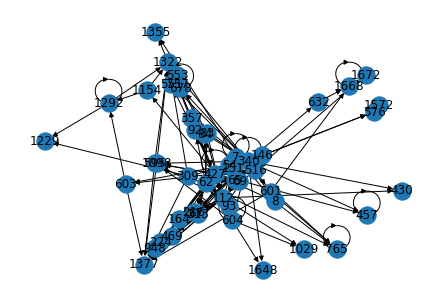

In [30]:
stepsBack=len(G_in.nodes)-50
G_seed=nx.DiGraph(G_in)
decideType='random'
while len(G_seed.nodes)>stepsBack:
            print(len(G_seed.nodes()))
            maximum=0
            maxPair=[]
            for ind,i in enumerate(G_seed.nodes):
                for j in list(G_seed.nodes)[-(len(list(G_seed.nodes))-ind-1):]:
                    
                    if ind<len(list(G_seed.nodes))-1:
                        GPrev=anc.node_merger(G_seed,i,j,self_loops=True)
                        testMax=anc.ancestral_likelihood_of_anchor_PD(G_seed,GPrev,i,j,q,divide_by_n=True,NK=True)
                        if testMax>maximum:
                            maximum=testMax
                            maxPair=[]
                        if testMax==maximum:
                            maxPair.append((i,j))
            if decideType=='random':
                
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_seed.nodes).index(i)<list(G_seed.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                        
                maxPair=random.choice(maxPair)
                G_seed=anc.node_merger(G_seed,maxPair[0],maxPair[1],self_loops=True)
nx.draw(G_seed,with_labels=True)

0.7089923004491292
0.7926580218014366


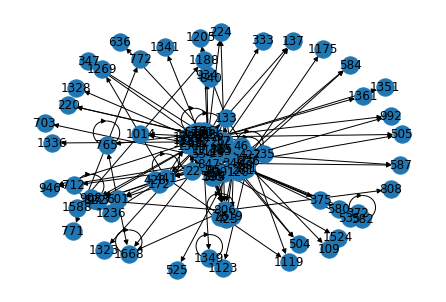

In [45]:
G_in=ut.met_hastings_connected_induced_subgraph(G_coli,100,3000,10)
#G_in2=ut.met_hastings_connected_induced_subgraph(G_coli,50,3000,10)
nx.draw(G_in,with_labels=True)
print(pd.portrait_divergence(G_in,G_seed))
print(pd.portrait_divergence(G_in,G_in2))

In [103]:
import copy
G_i=nx.DiGraph(G_in2)
G_in=nx.DiGraph(G_in)
#iso_n=1200

G_one=nx.DiGraph()
G_one.add_edge(0,0)
#q=anc.fit_p_degree_recurrence(G_coli,G_one,0.00001,iso_number=iso_n)
q=0.4
print(q)
#print("self loops predict",anc.expected_number_of_self_loops(G_coli,G_i,q))
#print("isolates predict",anc.expected_number_of_isolates(G_coli,G_i,q))
G_testt=dup.PED_PEA_isolates_corrected(G_i,0,q,steps=len(G_in.nodes),iteration=1)
G_testtt=dup.PED_PEA_isolates_included(G_i,0,q,steps=len(G_in.nodes),iteration=1)
print(pd.portrait_divergence(G_testtt,G_in))
print("degre real",ut.average_degree(G_testt))
print("clust real",nx.average_clustering(G_testt))
#print("self loops real",len(list(nx.selfloop_edges(G_testt))))
print("isolates real",len(list(nx.isolates(G_testtt))))
iso_n=len(list(nx.isolates(G_testtt)))
iso_n=0
#print("isolates predict",anc.expected_number_of_isolates_test(G_coli,G_i,q,iso_number=iso_n))
#print("list degree predict",anc.list_based_expected_degree(G_coli,G_i,q))
print("normal degree predict",anc.degree_recurrence(G_in,G_i,q,iso_number=int(iso_n)))
print("normal degree predict",anc.degree_recurrence(G_in,G_i,q,iso_number=0))
#print("normal degree predict",anc.degree_recurrence_test(G_coli,G_i,q,iso_number=int(q*iso_n)))
print("e coli degre",ut.average_degree(G_in))
print("e coli clust",nx.average_clustering(G_in))

0.4
100
100
0.5799033601234134
degre real 4.413333333333333
clust real 0.0800757644395259
isolates real 25
3.8
normal degree predict 4.437567905590367
3.8
normal degree predict 4.437567905590367
e coli degre 4.72
e coli clust 0.12286763993660331


In [2]:
from Genetc import ancestral as anc
import random
import networkx as nx
from Genetc import duplication as dup
import json as js
from Genetc import utilities as ut
G_ara=nx.read_edgelist("arabidopsis_GRN/arabidopsis_GRN_edges_only.txt",create_using=nx.DiGraph())
#G_ara=max(ut.connected_component_subgraphs(G_ara),key=len)
#print(nx.is_directed(G_ara))
G_ara=nx.convert_node_labels_to_integers(G_ara)
G_arab=nx.DiGraph()
for i in G_ara.nodes:
    G_arab.add_node(i)
for i in G_ara.edges:
    G_arab.add_edge(i[0],i[1])
#print(G_arab.edges)

#G_in=ut.non_uniform_random_connected_induced_subgraph(G_coli,100)
G_in=ut.met_hastings_connected_induced_subgraph(G_arab,100,3000,10)
#print(nx.average_clustering(G_arab))


In [4]:
nx.global_reaching_centrality(G_in)

0.44679114376084117

In [2]:
r=1.5
p=anc.fit_p_degree_recurrence(G_arab,G_in,0.000001,r)
print(p)

NameError: name 'anc' is not defined

1


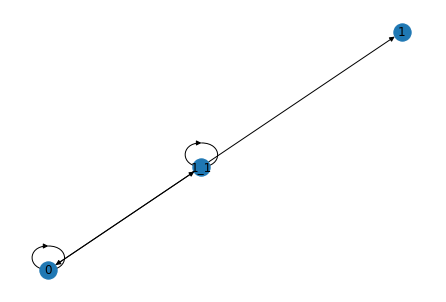

In [6]:
from Genetc import ancestral as anc
import random
import networkx as nx
from Genetc import duplication as dup
import json as js
from Genetc import utilities as ut
G=nx.DiGraph()
G.add_edge(0,0)
G.add_edge(0,1)
r=1000000000000000000000000000000
p=1
G=dup.PED_PEA_isolates_corrected(G,r,p,steps=1,iteration=1)
nx.draw(G,with_labels=True)

In [29]:
from Genetc import ancestral as anc
import random
import networkx as nx
from Genetc import duplication as dup
import json as js
from Genetc import utilities as ut
G_ath=nx.read_edgelist("arabidopsis_GRN/regulation_merged_Ath.txt",create_using=nx.DiGraph())

G_ath=nx.convert_node_labels_to_integers(G_ath)
G_atha=nx.DiGraph()
for i in G_ath.nodes:
    G_atha.add_node(i)
for i in G_ath.edges:
    G_atha.add_edge(i[0],i[1])
print(len(G_atha.nodes))
#G_in=ut.non_uniform_random_connected_induced_subgraph(G_coli,100)
G_in=ut.met_hastings_connected_induced_subgraph(G_atha,1000,5000,10)
print(nx.average_clustering(G_atha))

28644


KeyboardInterrupt: 

12773
True
2.0
2.0
6.982265046781115e-05 57287.99999999885 48.01934087417958
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
28643


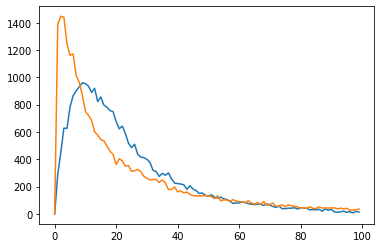

In [ ]:
from matplotlib import pyplot as plt
print(len(nx.degree_histogram(G_atha)))
plt.plot(nx.degree_histogram(G_atha)[:100])
print(nx.is_connected(nx.to_undirected(G_atha)))
#print(nx.average_clustering(G_atha))

G_model=nx.DiGraph()
G_model.add_edge(0,0)
q=anc.fit_p_degree_recurrence(G_atha,G_in,0.00001,iso_number=0)
G_grown=dup.PED_PEA_isolates_corrected(G_in,0,q,steps=len(G_atha.nodes)-1,iteration=1)
plt.plot(nx.degree_histogram(G_grown)[:100])

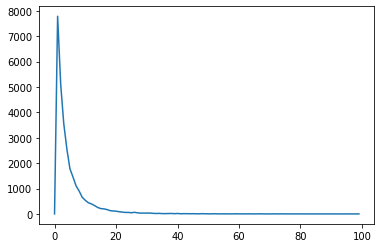

In [24]:
plt.plot(nx.degree_histogram(G_grown)[:100])

4.0
6.0
0.75
0.8333333333333334
[[4.  4.5 9. ]
 [4.5 4.  9. ]
 [9.  9.  4. ]]
true tri 4.0
predicted tri 4.0
true clust 1.0
predicted clust 1.0
pred cycle 1.0
pred cycle clust 1.0
1.0
reciprical 1.0
true tri 4.0
predicted tri 4.0
true clust 1.0
predicted clust 1.0
pred cycle 1.0
pred cycle clust 1.0
1.0
reciprical 1.0
true tri 4.0
predicted tri 4.0
true clust 0.5
predicted clust 0.5
pred cycle 1.0
pred cycle clust 0.5
1.0
reciprical 2.0
average tri 4.0


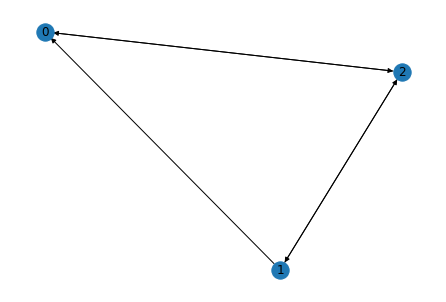

In [3]:
import numpy as np
import networkx as nx
from Genetc import utilities as ut
#GG=nx.DiGraph()

#GG.add_edge(1,0)
#GG.add_edge(0,1)
#GG.add_edge(1,2)
#GG.add_edge(2,1)
#GG.add_edge(2,0)
GG=nx.erdos_renyi_graph(3,0.7,directed=True)

#GG.remove_edge(0,2)
nx.draw(GG,with_labels=True)
print(nx.clustering(GG)[0]*(GG.degree(0)*(GG.degree(0)-1)-2*len(set(list(GG.predecessors(0)))^set(list(GG.successors(0))))))
print((1/3)*nx.transitivity(GG)*(GG.degree(0)*(GG.degree(0)-1)+GG.degree(1)*(GG.degree(1)-1)+GG.degree(2)*(GG.degree(2)-1)))
print(nx.transitivity(GG))
print(nx.average_clustering(GG))
print((1/2)*(nx.to_numpy_matrix(GG)+np.transpose(nx.to_numpy_matrix(GG)))**3)

for i in GG.nodes():
    print("true tri",((1/2)*(nx.to_numpy_matrix(GG)+np.transpose(nx.to_numpy_matrix(GG)))**3)[i,i])
    print("predicted tri",ut.count_all_triangles(GG,i))
    print("true clust",nx.clustering(GG)[i])
    print("predicted clust",ut.all_triangles_clustering(GG,i))
    print("pred cycle",ut.count_cycle_triangles(GG,i))
    print("pred cycle clust",ut.cycle_triangles_clustering(GG,i))
    print((nx.to_numpy_matrix(GG)**3)[i,i])
    print("reciprical",ut.reciprocal_degree(GG,i))
print("average tri",ut.average_all_triangles(GG))
#print("between deg",i,nx.reciprocity(GG,i)*GG.degree(i))
#print((nx.to_numpy_matrix(GG)**2)[i,i])


0.22794906719157665


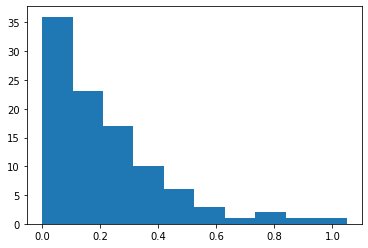

In [19]:
import networkx as nx
from Genetc import duplication as dup
from Genetc import ancestral as anc
from Genetc import utilities as ut
import numpy as np
import matplotlib.pyplot as plt
q=0.5
G_seed=nx.DiGraph()
fflVec=[]
G_seed.add_edge(0,1)
G_seed.add_edge(1,0)
G_seed.add_edge(1,2)
G_seed.add_edge(2,1)
G_seed.add_edge(2,0)
G_seed.add_edge(0,2)


for i in range(100):
    G=nx.DiGraph(G_seed)
    G=dup.PED_PEA_isolates_included(G,r=0,q=q,steps=100)
    fflVec.append(ut.average_FFL_triangles(G))
plt.hist(fflVec,bins=10)
print(anc.FFL_clustering_recurrence_no_selfloop_no_r(G,G_seed,q))


1 2
0.5


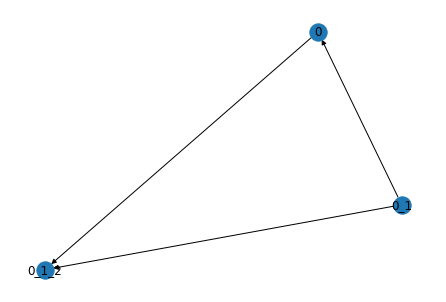

In [7]:

G.remove_edge(0,'0_1')
nx.draw(G,with_labels=True)
print(nx.transitivity(G))

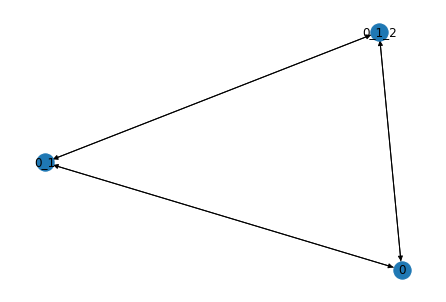

In [1]:
from Genetc import ancestral as anc
import random
import networkx as nx
from Genetc import duplication as dup
import json as js
from Genetc import utilities as ut
#G_zma=nx.read_edgelist("arabidopsis_GRN/arabidopsis_GRN_edges_only.txt",create_using=nx.DiGraph(),data=(("family", str),(("regulation_type",str)),))
G_zma=nx.read_edgelist("arabidopsis_GRN/arabidopsis_GRN_edges_only.txt",create_using=nx.DiGraph(),data=(("family", str),(("regulation_type",str)),))

G_zma=nx.convert_node_labels_to_integers(G_zma)
G_zmay=nx.DiGraph()
for i in G_zma.nodes:
    G_zmay.add_node(i)
for i in G_zma.edges:
    G_zmay.add_edge(i[0],i[1])
print("edges",len(G_zmay.edges))
print("nodes",len(G_zmay.nodes))
print("double edges",len([(i,j) for (i,j) in list(G_zma.edges) if (j,i) in list(G_zma.edges)]))

#G_in=ut.non_uniform_random_connected_induced_subgraph(G_coli,100)
#G_in=ut.met_hastings_connected_induced_subgraph(G_zmay,1000,5000,10)
#print(nx.average_clustering(G_zmay))
print("selfloops",len(list(nx.selfloop_edges(G_zmay))))
print("TFs",len([i for i in G_zmay.nodes if G_zmay.out_degree(i)!=0 ]))
print("nonsingly regulated genes",len([i for i in G_zmay.nodes if G_zmay.out_degree(i)==0 and G_zmay.in_degree(i)!=1]))

edges 1431
nodes 790
double edges 119
selfloops 25
TFs 324
nonsingly regulated genes 190


In [4]:
from Genetc import ancestral as anc
import random
import networkx as nx
from Genetc import duplication as dup
import json as js
from Genetc import utilities as ut
#G_zma=nx.read_edgelist("arabidopsis_GRN/arabidopsis_GRN_edges_only.txt",create_using=nx.DiGraph(),data=(("family", str),(("regulation_type",str)),))
G_zma=nx.read_edgelist("arabidopsis_GRN/arabidopsis_GRN_edges_only.txt",create_using=nx.DiGraph())

G_zma=nx.convert_node_labels_to_integers(G_zma)
G_zmay=nx.DiGraph()
for i in G_zma.nodes:
    G_zmay.add_node(i)
for i in G_zma.edges:
    G_zmay.add_edge(i[0],i[1])
print("edges",len(G_zmay.edges))
print("nodes",len(G_zmay.nodes))
#print("double edges",len([(i,j) for (i,j) in list(G_zma.edges) if (j,i) in list(G_zma.edges)]))

#G_in=ut.non_uniform_random_connected_induced_subgraph(G_coli,100)
G_in=ut.met_hastings_connected_induced_subgraph(G_zmay,100,5000,10)
#print(nx.average_clustering(G_zmay))
print("selfloops",len(list(nx.selfloop_edges(G_zmay))))
print("TFs",len([i for i in G_zmay.nodes if G_zmay.out_degree(i)!=0 ]))
print("nonsingly regulated genes",len([i for i in G_zmay.nodes if G_zmay.out_degree(i)==0 and G_zmay.in_degree(i)!=1]))

edges 1431
nodes 790


KeyboardInterrupt: 

In [12]:
q=0.8
G_in=nx.DiGraph(G_in)
steps=len(G_zmay.nodes)-len(G_in.nodes)
expIso=anc.expected_number_of_isolates(G_zmay,G_in,q)
G_model=dup.PED_PEA_isolates_included(G_in,0,q,steps=steps)
print("expIso",expIso)
print("actualIso",len([i for i in G_model.nodes if G_model.out_degree(i)==0 and G_model.in_degree(i)==0]))

[6.6, 0, 6.8, 0, 11.0, 4.0, 0.6, 6.6, 0.0, 1, 6, 4, 0.6, 5.599999999999999, 1.0, 0.6000000000000001, 13, 10.6, 0, 2.4000000000000004, 3.0, 2.5999999999999996, 4.0, 1.0, 0, 3.5999999999999988, 0.6, 11.0, 1.2000000000000002, 2, 0.19999999999999996, 5.6, 0.6, 5.0, 0, 0.6, 0.19999999999999996, 1.0, 2, 8.0, 1.5999999999999999, 14.2, 18, 1.8000000000000003, 0, 2.0, 1.0, 0.8, 0.19999999999999962, 0.0, 9, 0.0, 1.0, 0, 1.2000000000000002, 0, 6.2, 1.0, 0, 0.3999999999999999, 4.0, 6.2, 3.0, 6.0, 1.0, 2.4, 0.0, 1.0, 2.0, 0.6, 9.2, 5.8, 2, 2.0, 1.0, 1.0, 1.6, 0, 3.6, 4.0, 2.0, 1.0, 10.0, 4.6, 0, 3.0, 1.6, 0.0, 4.8, 1.2, 1.6, 0, 7.0, 0.0, 2.6, 0, 1.0, 0.19999999999999996, 2.2, 0.6, 0.0, 6.799999999999999, 0, 0.0, 0, 1.2, 7.2, 0, 2.4, 7.799999999999999, 1.2, 0, 0, 2.8, 0.19999999999999996, 0.0, 1.4, 0.6, 1.2, 0, 6.3999999999999995, 0.0, 0, 0, 0, 0.6, 0, 0.0, 0, 0.19999999999999996, 5.2, 0.6, 3.5999999999999996, 0.6, 0.0, 0, 0, 0.0, 0.0, 4.199999999999999, 0.0, 0.6, 2.1999999999999993, 0, 2.2, 0.0, 0.

In [4]:
import numpy as np

degList=[G_in.degree(i) for i in G_in.nodes]
print(degList)
listOfChosenGuys=[]
ind=random.choices(range(len(degList)),weights=degList)[0]
print(degList[ind])
print(random.choices(range(int(np.floor(min(degList))),int(np.ceil(max(degList)))),weights=list(np.histogram(degList,bins=int(np.floor(max(degList)))-int(np.ceil(min(degList))),density=True)[0]))[0])

for i in range(100):
    ind=random.choices(range(len(degList)),weights=degList)[0]
    
    listOfChosenGuys.append(degList[ind])
print(listOfChosenGuys)

[7, 2, 4, 7, 5, 1, 4, 2, 6, 4, 2, 2, 3, 4, 3, 3, 10, 3, 5, 1, 9, 6, 1, 2, 2, 11, 1, 1, 5, 4, 2, 2, 12, 6, 2, 5, 8, 6, 5, 9, 14, 4, 5, 3, 1, 1, 1, 1, 2, 3, 1, 7, 1, 3, 3, 1, 4, 1, 1, 1, 1, 3, 5, 1, 2, 7, 2, 6, 1, 2, 2, 3, 1, 4, 4, 4, 4, 1, 2, 2, 1, 3, 5, 2, 7, 2, 1, 2, 6, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1]
8
3
[1, 7, 6, 4, 9, 9, 14, 4, 6, 12, 1, 9, 12, 7, 5, 4, 3, 4, 6, 5, 2, 3, 8, 9, 9, 4, 7, 2, 2, 7, 4, 4, 1, 2, 5, 4, 2, 4, 3, 9, 7, 2, 12, 4, 7, 3, 9, 12, 1, 4, 11, 11, 7, 2, 1, 3, 6, 6, 7, 1, 6, 4, 4, 5, 4, 7, 4, 6, 6, 4, 1, 2, 1, 4, 7, 1, 3, 12, 10, 10, 4, 3, 5, 9, 6, 4, 1, 10, 4, 9, 7, 10, 5, 9, 2, 1, 8, 1, 10, 5]


In [39]:
G_er=nx.erdos_renyi_graph(10,0.5,directed=True)
count=0
while nx.global_reaching_centrality(G_er)==0:
    G_er=nx.erdos_renyi_graph(100,0.001,directed=True)
    count=count+1
print(count)
print(nx.global_reaching_centrality(G_er))

1
0.009080706050403004


In [10]:
from network_portrait_divergence_master import portrait_divergence as pd
from Genetc import ancestral as anc
import random
import networkx as nx
from Genetc import duplication as dup
import json as js
from Genetc import utilities as ut
import numpy as np
q=0.6
r=0.1
v1=[]
v2=[]
v3=[]
v4=[]
v5=[]
v6=[]
v7=[]
v8=[]
v9=[]
steps=100
G=ut.met_hastings_connected_induced_subgraph(G_zmay,100,5000,10)
G=nx.DiGraph()
G.add_edge(0,0)
for j in range(100):
    print(j)
    G1=nx.DiGraph(G)
    for i in range(steps):
        
        G1=dup.PED_PEA(G1,r,q,edge_add_type='standard',iteration=i,edge_add_TF_only=False)
    G2=nx.DiGraph(G)
    for i in range(steps):
        
        G2=dup.PED_PEA(G2,r,q,edge_add_type='uniform',iteration=i,edge_add_TF_only=False)
    G3=nx.DiGraph(G)
    for i in range(steps):
        
        G3=dup.PED_PEA(G3,r,q,edge_add_type='preferential',iteration=i,edge_add_TF_only=False)
    
    G4=nx.DiGraph(G)
    for i in range(steps):
        
        G4=dup.PED_PEA(G4,r,q,edge_add_type='standard',iteration=i,edge_add_TF_only=True)
    G5=nx.DiGraph(G)
    for i in range(steps):
        
        G5=dup.PED_PEA(G5,r,q,edge_add_type='uniform',iteration=i,edge_add_TF_only=True)
    G6=nx.DiGraph(G)
    for i in range(steps):
        
        G6=dup.PED_PEA(G6,r,q,edge_add_type='preferential',iteration=i,edge_add_TF_only=True)
    v1.append(pd.portrait_divergence(G1,G2))
    v2.append(pd.portrait_divergence(G1,G3))
    v3.append(pd.portrait_divergence(G2,G3))

    v4.append(pd.portrait_divergence(G4,G5))
    v5.append(pd.portrait_divergence(G4,G6))
    v6.append(pd.portrait_divergence(G5,G6))

    v7.append(pd.portrait_divergence(G1,G4))
    v8.append(pd.portrait_divergence(G2,G5))
    v9.append(pd.portrait_divergence(G3,G6))

print(np.mean(v1))
print(np.mean(v2))
print(np.mean(v3))
print(np.mean(v4))
print(np.mean(v5))
print(np.mean(v6))
print(np.mean(v7))
print(np.mean(v8))
print(np.mean(v9))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0.5498267958076148
0.5547598810966042
0.5902120838382914
0.5615500031231659
0.5444521171059534
0.5898666589828182
0.548373228690848
0.5759569371621417
0.5449896138797594


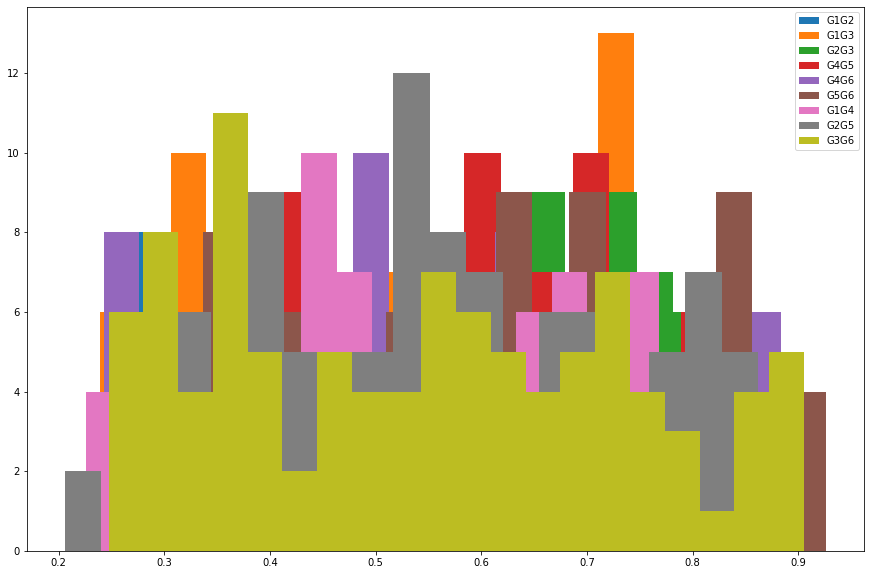

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.hist(v1,label="G1G2",bins=20)
plt.hist(v2,label="G1G3",bins=20)
plt.hist(v3,label="G2G3",bins=20)
plt.hist(v4,label="G4G5",bins=20)
plt.hist(v5,label="G4G6",bins=20)
plt.hist(v6,label="G5G6",bins=20)
plt.hist(v7,label="G1G4",bins=20)
plt.hist(v8,label="G2G5",bins=20)
plt.hist(v9,label="G3G6",bins=20)
plt.legend()
plt.show()

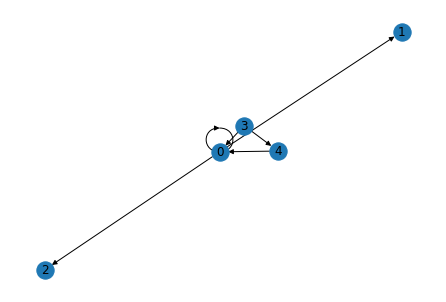

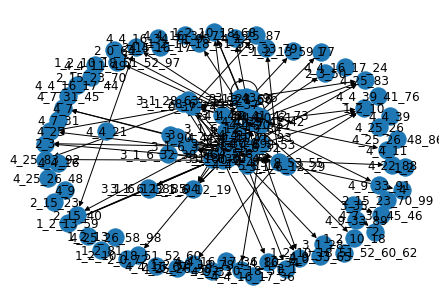

In [49]:
G_s=nx.DiGraph()
G_s.add_edge(3,0)
G_s.add_edge(3,4)
G_s.add_edge(4,0)
G_s.add_edge(0,0)
G_s.add_edge(0,1)
G_s.add_edge(0,2)
nx.draw(G_s,with_labels=True)
G_ss=nx.DiGraph(G_s)
iteration=1
q=0.6
r=0.2
for i in range(100):
    G_ss=dup.PED_PEA(G_ss,r,q,edge_add_type='preferential',iteration=i,edge_add_TF_only=True)
plt.figure()
nx.draw(G_ss,with_labels=True)

In [39]:
print(G_ss.edges())

[(3, 0), (3, 4), (3, 2), (0, 0), (0, 1), (0, 2), (0, '2_1'), (4, 0), (4, '2_1')]
